# Overview
"Superstore Sales" generally refers to the sales data and performance of a superstore or a large retail store that offers a wide range of products and merchandise. These superstores are typically known for their extensive inventory, competitive pricing, and one-stop shopping experience.

Analyzing superstore sales data is essential for store owners, managers, and analysts to understand the store's performance, identify trends, and make informed business decisions. Here are some key aspects of superstore sales analysis:

Sales Revenue: Tracking the total sales revenue over time provides insights into the overall financial performance of the superstore. It helps identify peak seasons and periods of high or low sales.

Sales by Product Category: Analyzing sales by product category (e.g., electronics, apparel, home goods) helps understand which categories are driving revenue and which may require improvement.

Sales by Region: Superstores often have multiple locations. Analyzing sales by region helps identify the best-performing stores and areas for expansion or improvement.

Sales by Customer Segments: Understanding sales patterns among different customer segments can inform targeted marketing strategies and customer engagement.

Sales Trends: Identifying sales trends over time, such as monthly or seasonal variations, can help in inventory management and marketing planning.

Product Performance: Analyzing individual product sales can help identify popular products, slow-moving items, and potential stockouts.

Customer Behavior: Studying customer behavior, such as purchase frequency, average transaction value, and repeat purchases, provides insights into customer preferences and loyalty.

Promotions and Discounts: Evaluating the impact of promotions and discounts on sales can help optimize marketing strategies.

Sales Forecasting: Using historical sales data, superstore owners and managers can forecast future sales, plan inventory levels, and make data-driven decisions.

To conduct thorough sales analysis, superstores often use data visualization tools, spreadsheets, or specialized retail analytics software. These tools help present the data in a visually appealing and easy-to-understand format, enabling better decision-making and strategic planning. Additionally, by integrating sales data with other metrics like profitability, inventory turnover, and customer satisfaction, superstore owners can gain a comprehensive view of their business performance.

# Data Source
https://www.kaggle.com/datasets/bhanupratapbiswas/superstore-sales

# Imports

In [7]:
# Data Wrangling
import numpy as np
import pandas as pd

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns


# Data Overview
ok, so that was an overview of the data and the problem statements.    
Now let's see what we have as a data. 

In [8]:
data = pd.read_csv(f'../data/raw/data.csv', encoding='ansi')

In [9]:
data.head()

,Row_ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Country,City,State,Postal_Code,Region,Product_ID,Category,Sub_Category,Product_Name,Sales
0,1,CA-2017-152156,8/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,8/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/6/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O Donnel,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O Donnel,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold N Roll Cart System,22.3680


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row_ID         9800 non-null   int64  
 1   Order_ID       9800 non-null   object 
 2   Order_Date     9800 non-null   object 
 3   Ship_Date      9800 non-null   object 
 4   Ship_Mode      9800 non-null   object 
 5   Customer_ID    9800 non-null   object 
 6   Customer_Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal_Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product_ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub_Category   9800 non-null   object 
 16  Product_Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [11]:
data.describe()

,Row_ID,Postal_Code,Sales
count,9800.000000,9789.000000,9800.000000
mean,4900.500000,55273.322403,230.769059
std,2829.160653,32041.223413,626.651875
min,1.000000,1040.000000,0.444000
25%,2450.750000,23223.000000,17.248000
50%,4900.500000,58103.000000,54.490000
75%,7350.250000,90008.000000,210.605000
max,9800.000000,99301.000000,22638.480000


<Axes: >

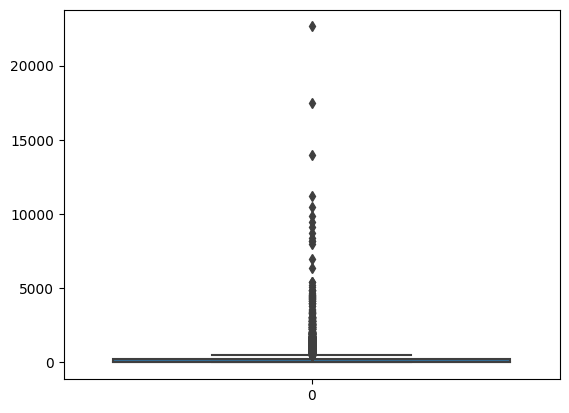

In [12]:
sns.boxplot(data.Sales)

In [13]:
data.duplicated().sum()

0

In [14]:
data.isnull().sum()

Row_ID            0
Order_ID          0
Order_Date        0
Ship_Date         0
Ship_Mode         0
Customer_ID       0
Customer_Name     0
Segment           0
Country           0
City              0
State             0
Postal_Code      11
Region            0
Product_ID        0
Category          0
Sub_Category      0
Product_Name      0
Sales             0
dtype: int64

In [15]:
dates = sorted(pd.to_datetime(data.Order_Date, format='mixed'))
dates = pd.DataFrame(dates, columns=['Order_Date'])
print('2015-01-04\n--------------------------------\n', dates[dates.Order_Date == '2015-01-04'], '\n--------------------------------')
print('2015-01-05\n--------------------------------\n', dates[dates.Order_Date == '2015-01-05'])

2015-01-04
--------------------------------
    Order_Date
11 2015-01-04
12 2015-01-04
13 2015-01-04
14 2015-01-04 
--------------------------------
2015-01-05
--------------------------------
 Empty DataFrame
Columns: [Order_Date]
Index: []


# Key Takeaways
- There are 18 features out which there is only 1 numerical feature. (Postal_Code and Row_ID are not actually numerical features)   
- Some features have incorrect data types
- There seems to be no duplicates 
- There are some missing values in Postal Code and there also seems to some missing days
- Some features might not be necessary like Postal_Code, Row_ID.
- There seems to be some outliers in sales . 
- Mean is 231 and standard deviation is 627 but the maximum value is 22638 which is quite a big difference. 
- Minimum value 0.44 on the other hand seems to be normal. 
- Data Distribution is probably right-skewed.

# Distributions
Since distributions were mentioned. Let's find out how the data is distributed starting with the numerical features.

# Numerical
Sale is the only numerical feature in the data.  
Maybe Ship_Date and Ship_Mode can be used as numerical features.


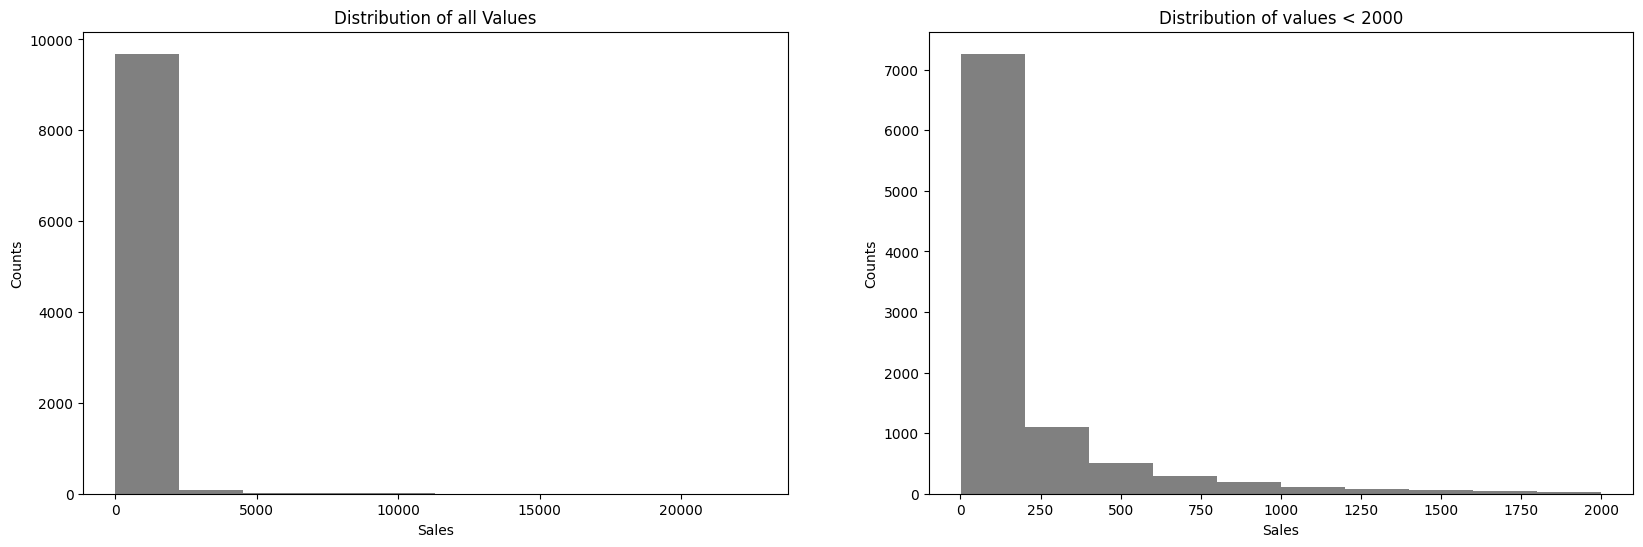

In [16]:
# plt.figure(figsize=(20,10))
# plt.title('Distribution of Sales')
fig, (ax, ax1) = plt.subplots(1, 2, figsize=(20, 6))
ax.set_xlabel("Sales")
ax.set_ylabel("Counts")
ax1.set_xlabel("Sales")
ax1.set_ylabel("Counts")
ax.set_title('Distribution of all Values')
ax1.set_title('Distribution of values < 2000')
# ax.set_xlim(0, 25000)
# ax.set_ylim(0, 1000)
ax.hist(data.Sales, bins=10, color='Grey')
ax1.hist(data[data.Sales < 2000].Sales, bins=10, color='Grey')
# plt.hist(data.Sales, bins=100)
plt.show()

- There are only few values which are higher than 2000. They might be outliers.  
- Most of the values are between 0 and 200.

## Trend in Total Sales

In [17]:
data.Order_Date = pd.to_datetime(data.Order_Date, format='mixed')

<Axes: title={'center': 'Daily Sales'}, xlabel='Order_Date', ylabel='Sales'>

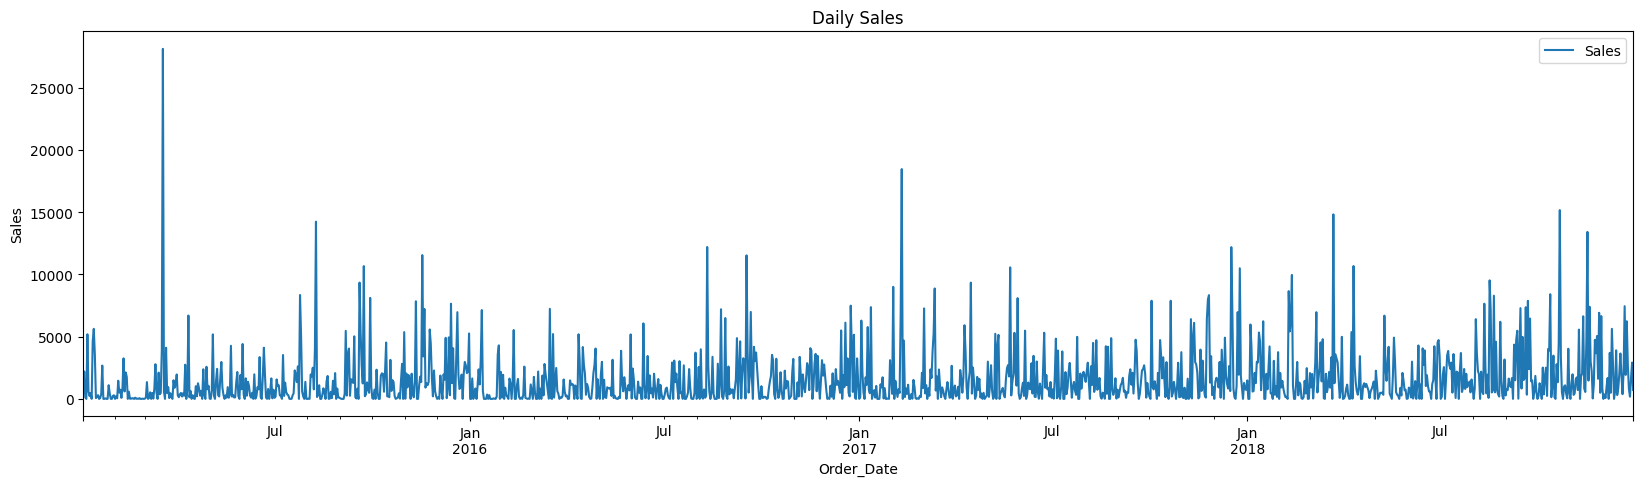

In [18]:
# There are some duplicate values in the Order_Date feature so resampling is done
total = data[['Order_Date', 'Sales']].set_index('Order_Date')
total.resample(rule='D').sum().plot(title='Daily Sales', figsize=(20, 5), ylabel='Sales')

<Axes: title={'center': 'Weekly Sales'}, xlabel='Order_Date', ylabel='Sales'>

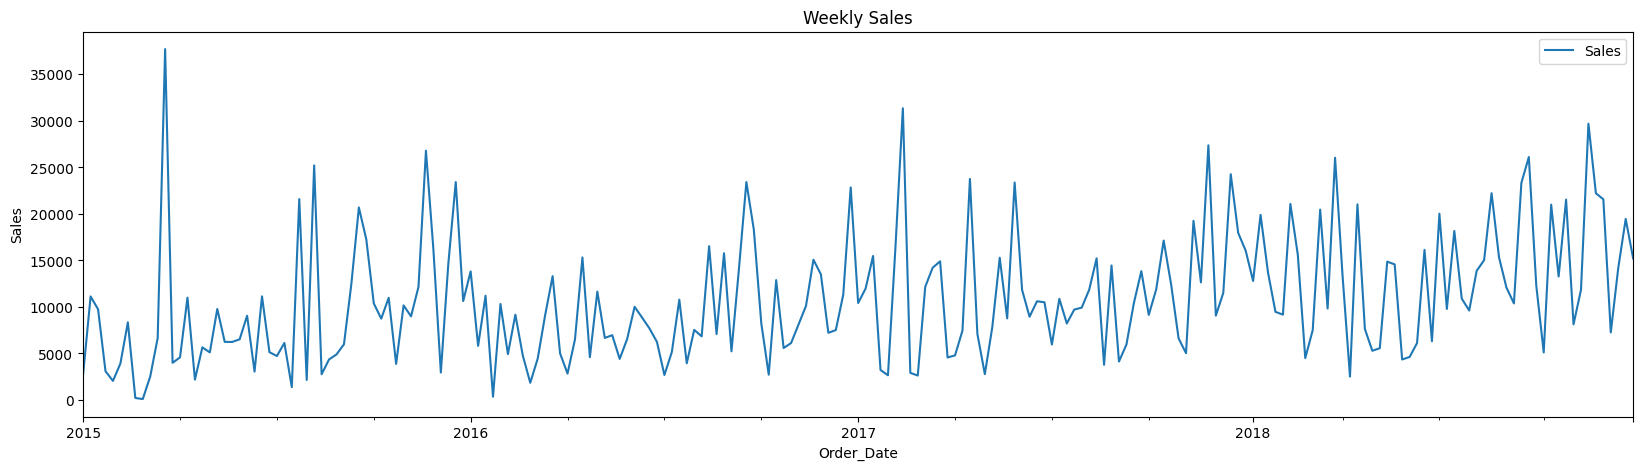

In [19]:
total.resample(rule='W').sum().plot(title='Weekly Sales', figsize=(20, 5), ylabel='Sales')

- The data is from 2015 to 2018.    
- The daily data doesn't look quite clear.     
- There are some peaks near New Year but doesn't seems to have trend or seasonality.     
- Weeky data seems to have a little bit of upward trend and doesn't seems to be seasonal.    
- Statistical Tests will be needed to determine the seasonality and trend.

## Total Sales

In [20]:
total_sales = total.sum()/10**6
print("{:.3}".format(total_sales[0]), 'million')

2.26 million


## Daily Trend for each Year

In [21]:
daily_total = total.resample(rule='D').sum()
daily_total['Year'] = daily_total.index.to_period('Y')


<Axes: title={'center': 'Daily Sales 2018'}, xlabel='Order_Date', ylabel='Sales'>

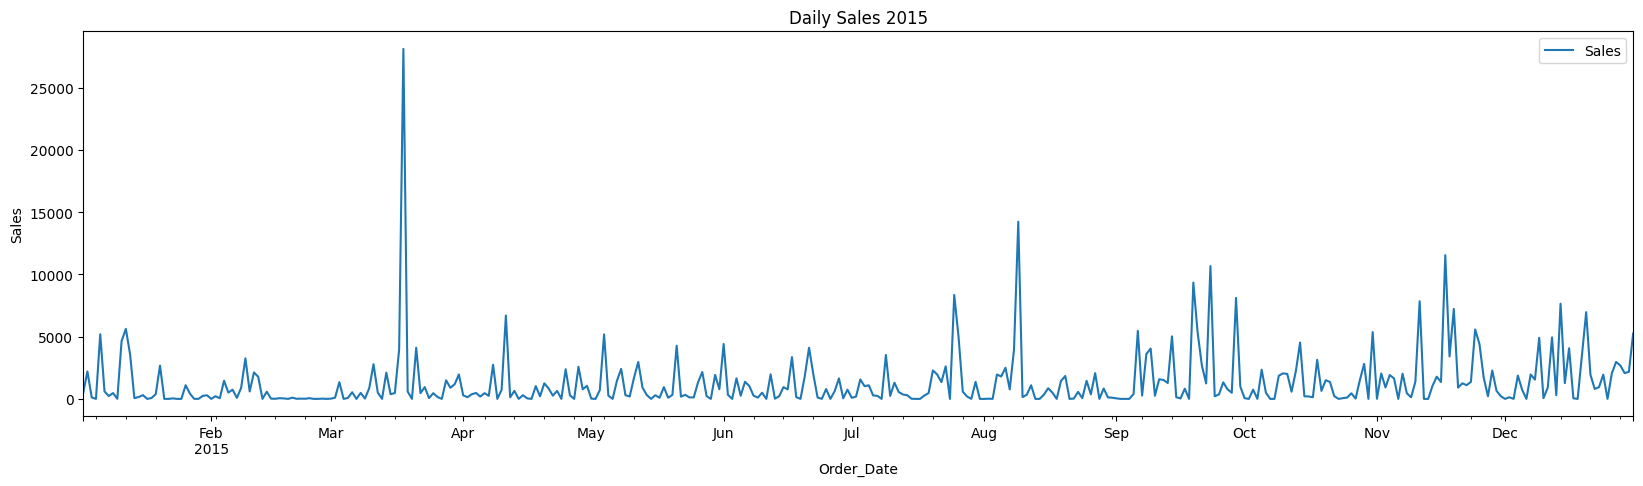

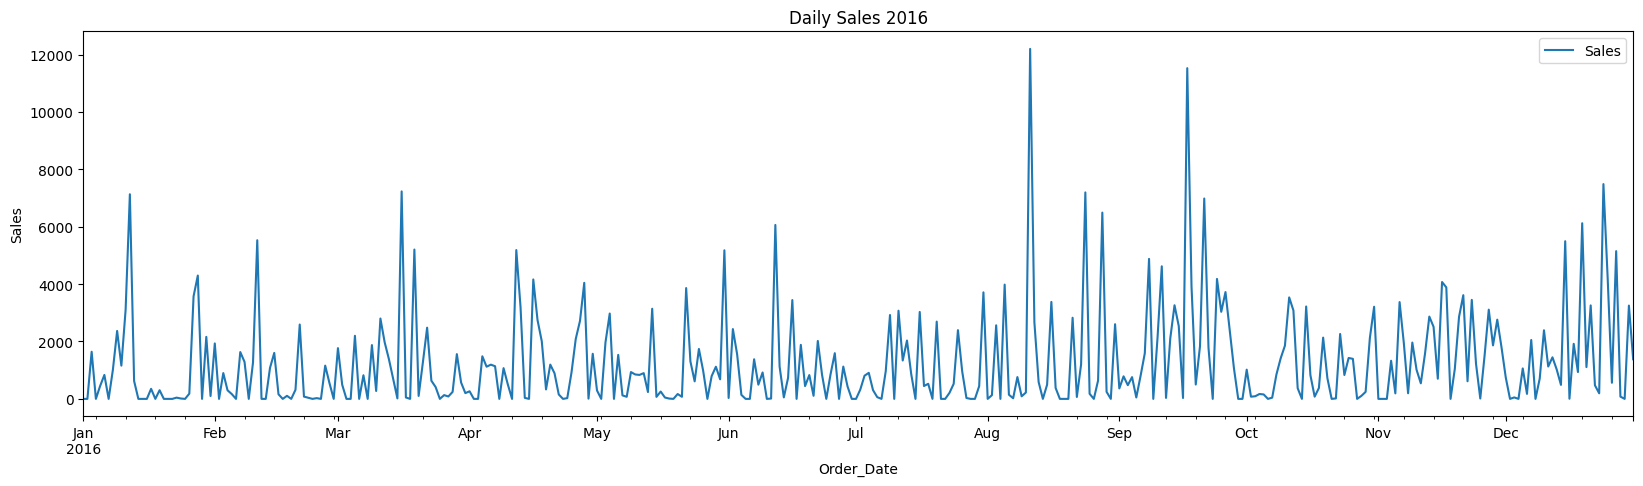

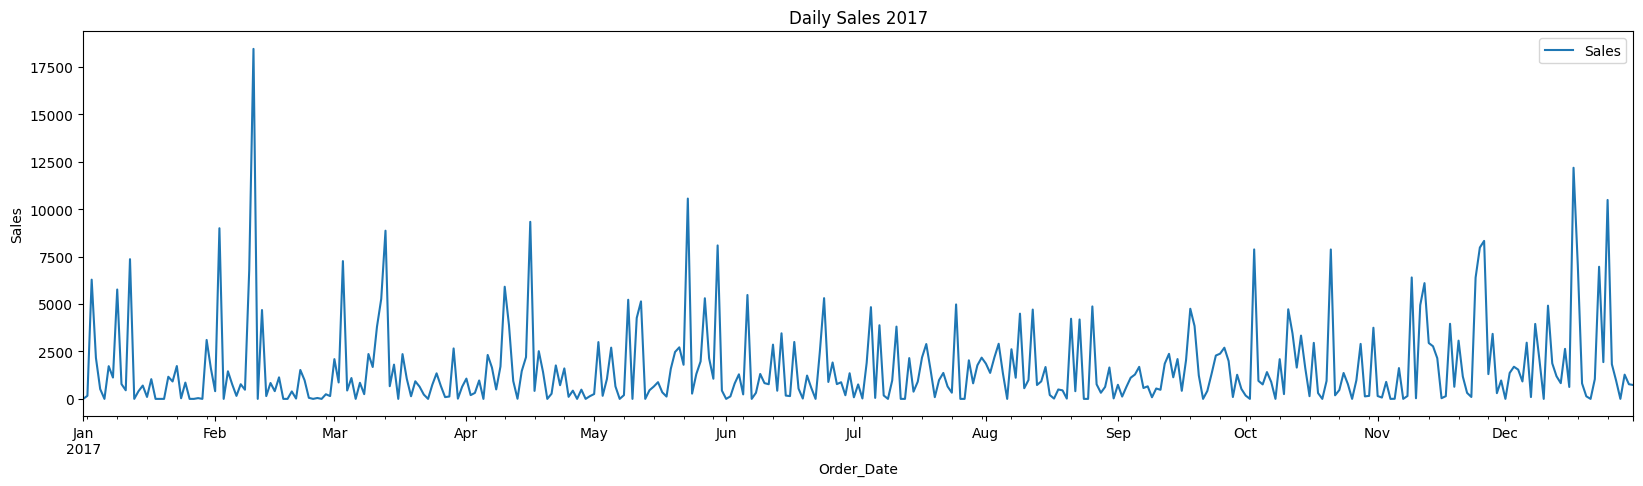

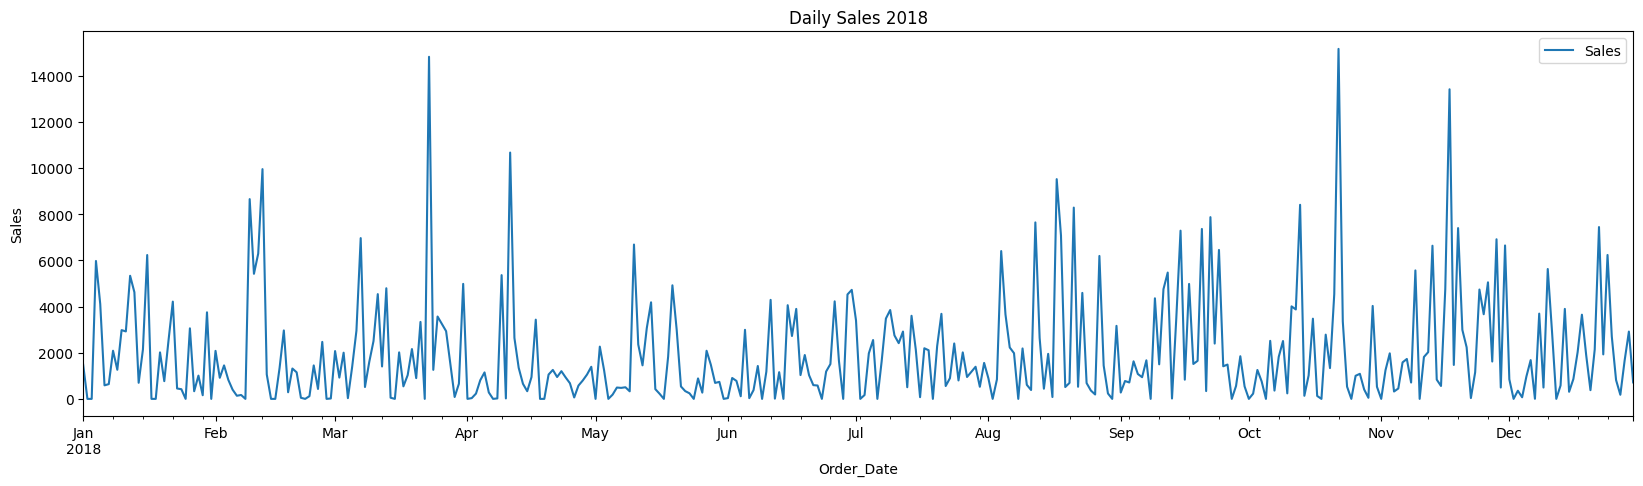

In [22]:
total_2015 = daily_total[daily_total.index < '2016']
total_2016 = daily_total[(daily_total.index >= '2016') & (daily_total.index < '2017')]
total_2017 = daily_total[(daily_total.index >= '2017') & (daily_total.index < '2018')]
total_2018 = daily_total[(daily_total.index >= '2018') & (daily_total.index < '2019')]

total_2015.plot(title='Daily Sales 2015', figsize=(20, 5), ylabel='Sales')
total_2016.plot(title='Daily Sales 2016', figsize=(20, 5), ylabel='Sales')
total_2017.plot(title='Daily Sales 2017', figsize=(20, 5), ylabel='Sales')
total_2018.plot(title='Daily Sales 2018', figsize=(20, 5), ylabel='Sales')

## Total Sales in each year

Text(0.5, 1.0, 'Total Sales in each Year')

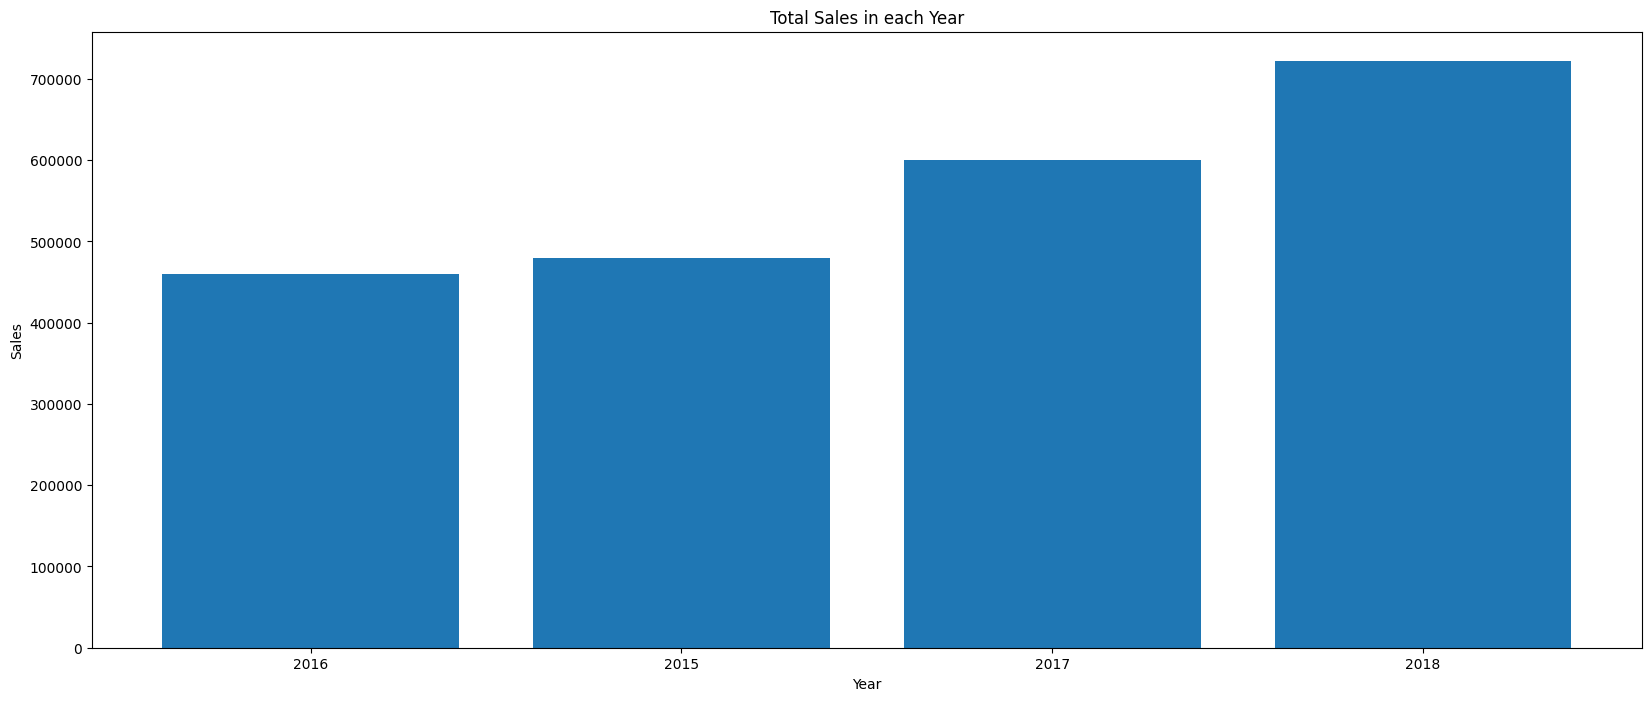

In [23]:

yearly_sales = daily_total.groupby('Year').sum().sort_values('Sales', ascending=True)
plt.figure(figsize=(20, 8))
plt.bar(x=yearly_sales.index.astype('str'), height=yearly_sales.Sales)
plt.xlabel('Year')
plt.ylabel('Sales')
plt.title('Total Sales in each Year')

- Total sales increased each year.

## Key Takeaways
- Total Sales are 2.26 million
- Sales increased each year
- Sales might have upward trend
- Sales might not have seasonality

# Categorical

In [24]:
# Let's find out unique values for each categorical feature first
for feature in data.drop(['Sales', 'Order_Date', 'Ship_Date'], axis=1).columns:
    print(feature, ': ', len(data[feature].unique()))

Row_ID :  9800
Order_ID :  4922
Ship_Mode :  4
Customer_ID :  793
Customer_Name :  793
Segment :  3
Country :  1
City :  529
State :  49
Postal_Code :  627
Region :  4
Product_ID :  1861
Category :  3
Sub_Category :  17
Product_Name :  1849


Here are some things to look at:
- There are 4922 Order_IDs but the enteries in data are 9800 which means there are repeated Order_IDs which shouldn't be the case or it might be due to different products being bought in the same order.
- Customer_IDs match up with Customer_Name. One of these features can be dropped. There is a possibility of wrong ids assigned but for now let's assume that all ids are correctly assigned.
- There is only one country so this feature seems unnecessary.
- Segment, City, Region, and State need to be further analyzed to see how the sales are divided.
- There seems to be 1861 products which belong to 3 different categories and further divided into sub categories. 
- Few of the products seems to be misnamed.

In [25]:
data.head()

,Row_ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Country,City,State,Postal_Code,Region,Product_ID,Category,Sub_Category,Product_Name,Sales
0,1,CA-2017-152156,2017-08-11,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,2017-08-11,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,2017-12-06,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,2016-11-10,18/10/2016,Standard Class,SO-20335,Sean O Donnel,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,2016-11-10,18/10/2016,Standard Class,SO-20335,Sean O Donnel,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold N Roll Cart System,22.3680


# Main Categories
Sales can be divided according to these three categories:
- Geography
- Customers
- Products

# Geography 
Geography category includes the Region which is divided into States and States are further divided into Cities.    
So, there are 3 levels to look at.

In [26]:
geography = {}
for region in data.Region.unique():
    geography[region] = {}
    # print(region)
    states = data[data.Region == region].State.unique()
    # print(states)
    for state in states:
        geography[region][state] = []
        for city in data[data.State == state].City.unique():
            geography[region][state].append(city)

pd.DataFrame(geography)    

,South,West,Central,East
Kentucky,"[Henderson, Richmond, Louisville, Florence, Mu...",NaN,NaN,NaN
Florida,"[Fort Lauderdale, Melbourne, Tampa, Tamarac, S...",NaN,NaN,NaN
North Carolina,"[Concord, Durham, Charlotte, Chapel Hill, Wilm...",NaN,NaN,NaN
Virginia,"[Springfield, Arlington, Waynesboro, Richmond,...",NaN,NaN,NaN
Tennessee,"[Memphis, Bristol, Franklin, Columbia, Murfree...",NaN,NaN,NaN
Alabama,"[Decatur, Montgomery, Florence, Mobile, Auburn...",NaN,NaN,NaN
South Carolina,"[Columbia, Florence, North Charleston, Summerv...",NaN,NaN,NaN
Louisiana,"[Monroe, Bossier City, Lafayette, Lake Charles...",NaN,NaN,NaN
Georgia,"[Columbus, Atlanta, Warner Robins, Roswell, Ma...",NaN,NaN,NaN
Mississippi,"[Jackson, Gulfport, Southaven, Hattiesburg]",NaN,NaN,NaN


## Region 
- Region is the highest level in geography.       
- There are four regions in total which can be seen in the above table. 

## Trend in Region Sales

In [27]:
regions_data = data.set_index('Order_Date').groupby(['Region']).Sales.resample(rule='W').sum()

<Axes: title={'center': 'Central Region Sales'}, xlabel='Order_Date', ylabel='Sales'>

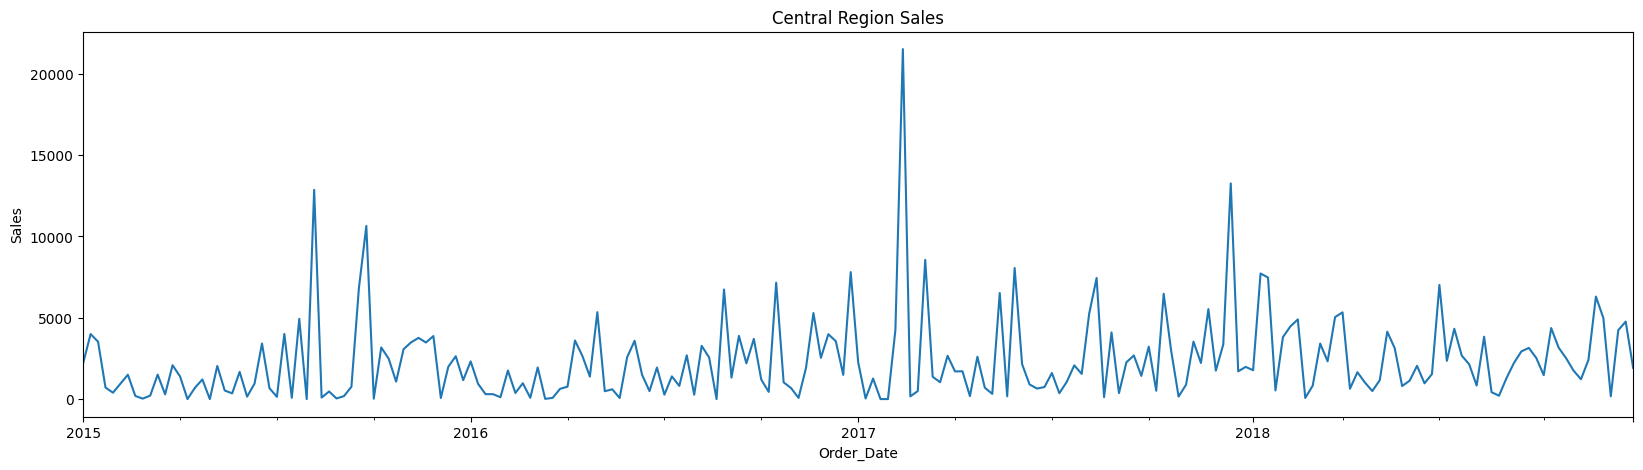

In [28]:
regions_data.Central.plot(title='Central Region Sales', figsize=(20, 5), ylabel='Sales')

<Axes: title={'center': 'South Region Sales'}, xlabel='Order_Date', ylabel='Sales'>

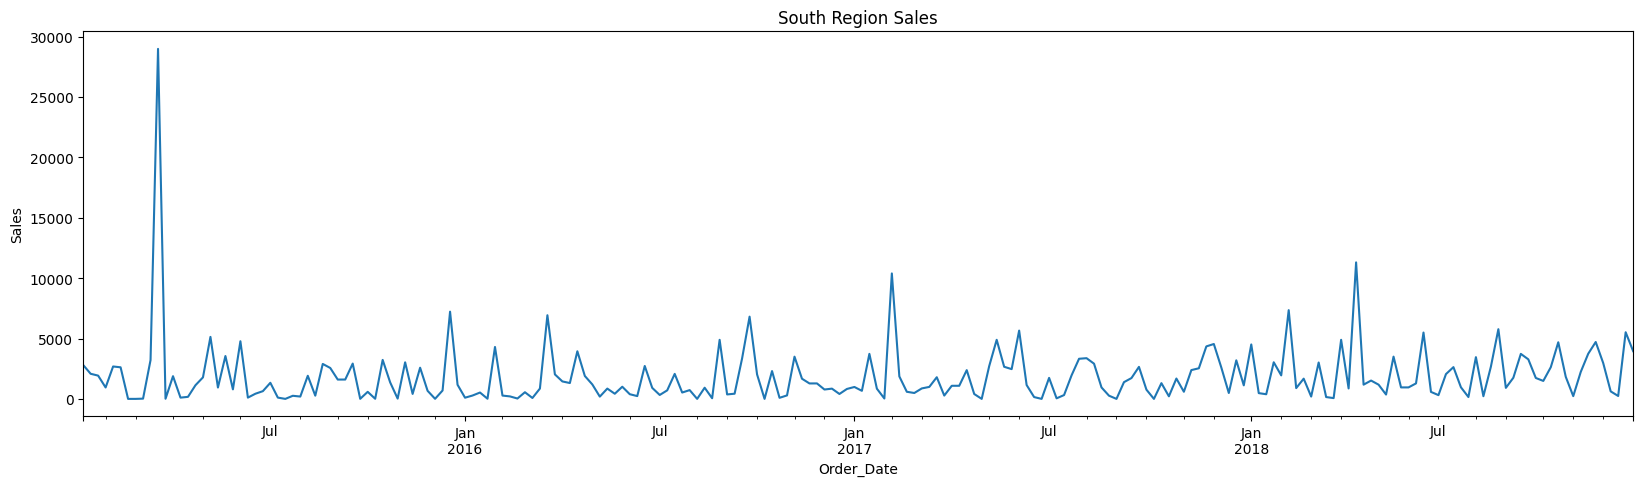

In [29]:
regions_data.South.plot(title='South Region Sales', figsize=(20, 5), ylabel='Sales')

## Which region has the highest sales?

In [30]:
region_sales = regions_data.reset_index().set_index('Order_Date').groupby('Region').sum().sort_values('Sales', ascending=False)
region_sales

,Sales
Region,
West,710219.6845
East,669518.7260
Central,492646.9132
South,389151.4590


Text(0.5, 1.0, 'Sales in Regions')

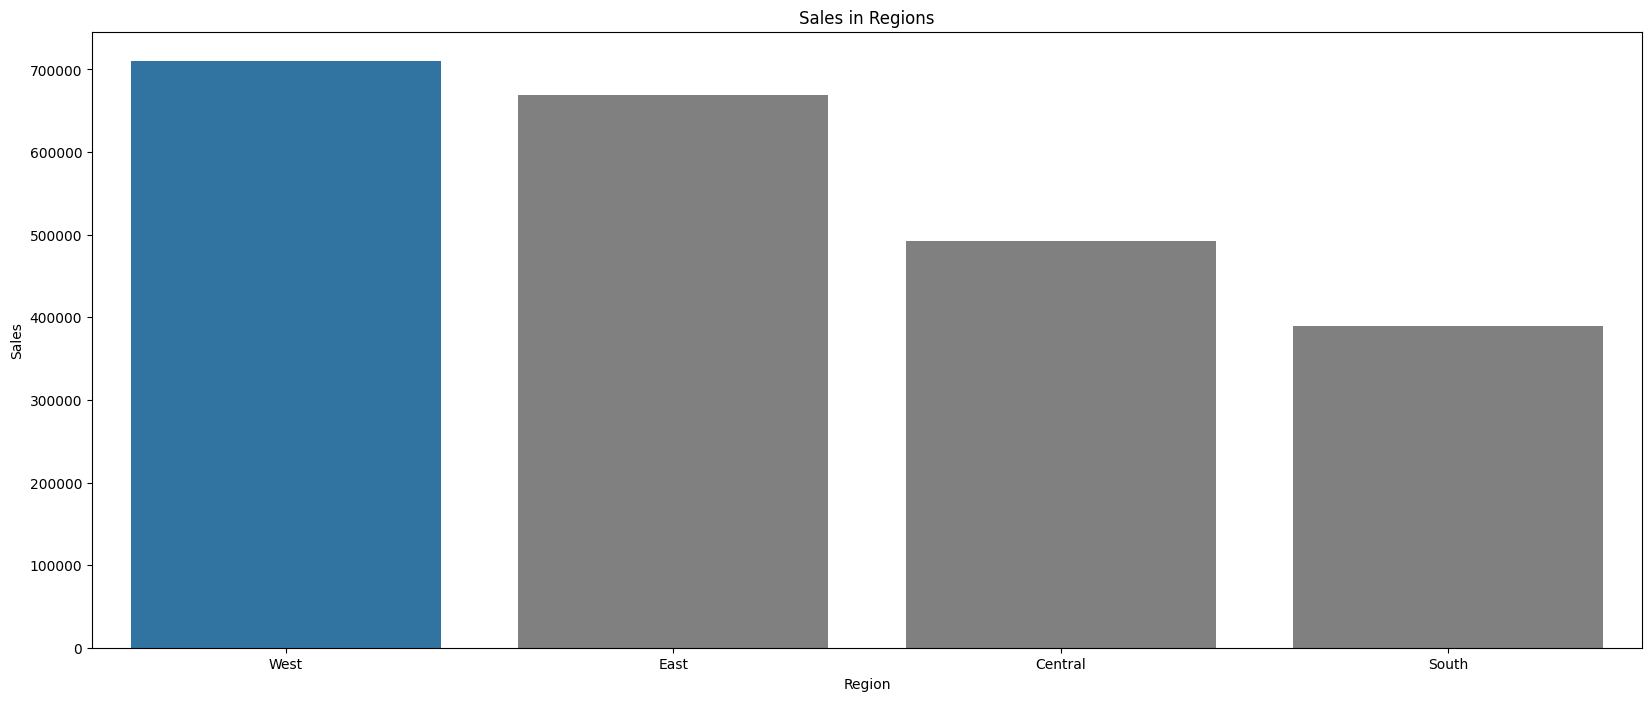

In [31]:
colors = ["#1f77b4" if x==region_sales.index[0] else 'grey' for x in region_sales.index]
plt.figure(figsize=(20, 8))
sns.barplot(x=region_sales.index, y=region_sales.Sales, color='Grey', palette=colors)
plt.title('Sales in Regions')
# plt.annotate('Highest Sales Region: West\nLowest Sales Region: South', xy=(3,700000))
# sns.barplot(order)

West Region has the highest sales while East Region is just a little below.    
South Region has the lowest sales while Central Region is just a little above. 

## State
- State is the middle level in the geography.
- There are 49 states in total.     
- Each region seems to have around 10 states.     

## Trend in State Sales

<Axes: title={'center': 'Michigan State Sales'}, xlabel='Order_Date', ylabel='Sales'>

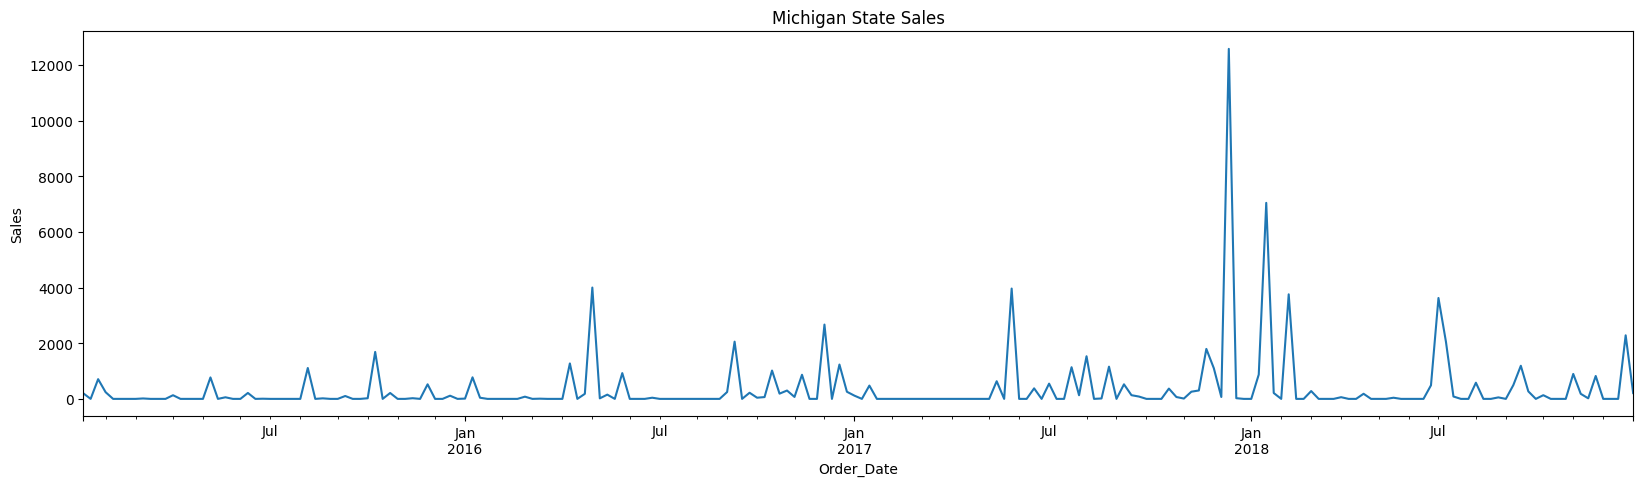

In [32]:
states_data = data.set_index('Order_Date').groupby(['Region', 'State']).Sales.resample(rule='W').sum()
states_data.Central.Michigan.plot(title='Michigan State Sales', figsize=(20, 5), ylabel='Sales')

## Which state in each region has the highest sales?

In [33]:
south_states = states_data.South
south_state_sales = south_states.reset_index().set_index('Order_Date').groupby('State').sum().sort_values('Sales', ascending=False)

west_states = states_data.West
west_state_sales = west_states.reset_index().set_index('Order_Date').groupby('State').sum().sort_values('Sales', ascending=False)

central_states = states_data.Central
central_state_sales = central_states.reset_index().set_index('Order_Date').groupby('State').sum().sort_values('Sales', ascending=False)

east_states = states_data.East
east_state_sales = east_states.reset_index().set_index('Order_Date').groupby('State').sum().sort_values('Sales', ascending=False)

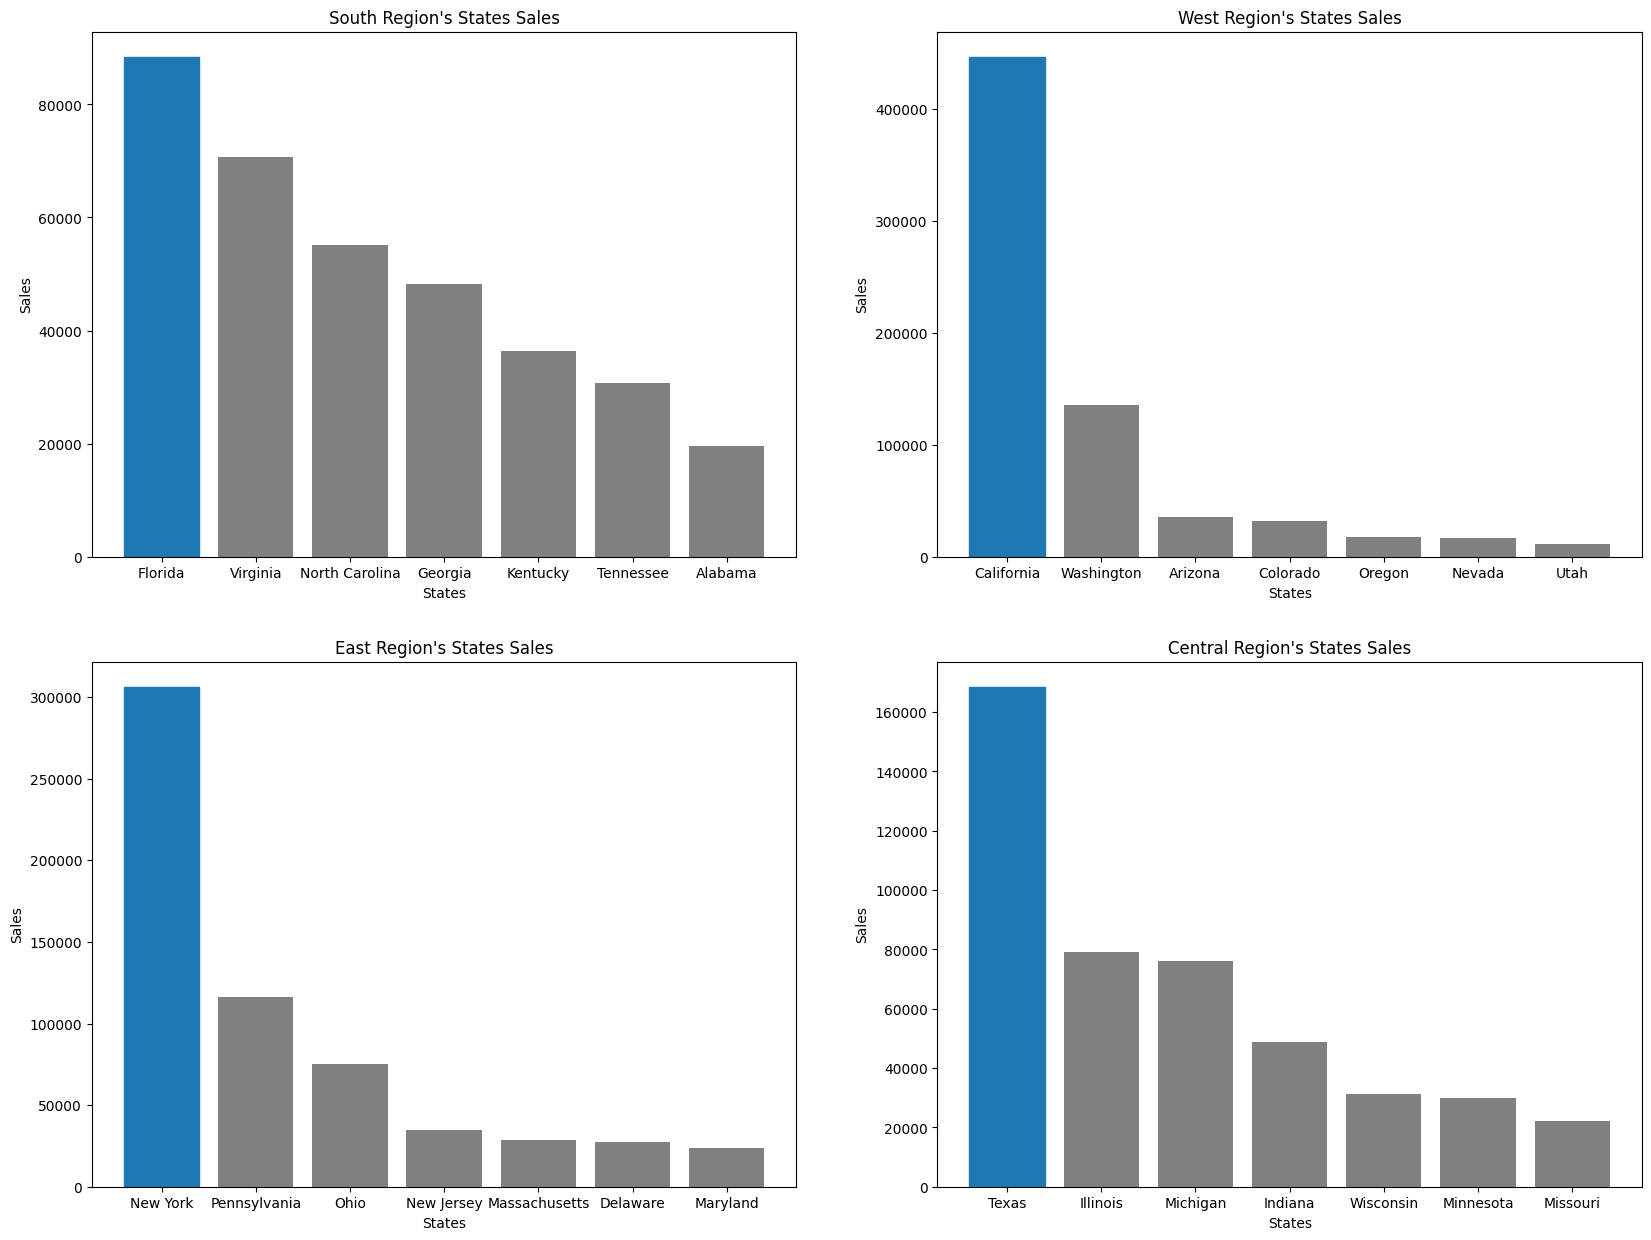

In [34]:
fig, ax = plt.subplots(2, 2, figsize=(20, 15))
row = 0
col = 0
region_names = ['South', 'West', 'East', 'Central']
for idx, state in enumerate([south_state_sales[0:7], west_state_sales[0:7], east_state_sales[0:7], central_state_sales[0:7]]):
    bar = ax[row][col].bar(x=state.index, height=state.Sales, color='Grey')
    bar[0].set_color('#1f77b4')
    ax[row][col].set_title(f"{region_names[idx]} Region's States Sales")
    ax[row][col].set_xlabel('States')
    ax[row][col].set_ylabel('Sales')
    if col == 1:
        col = 0
        row += 1
    else:
        col += 1

## Highest Sales
- South: Florida    
- West: California    
- East: New York    
- Central: Texas    
- Overall: California    

## City
- City is the lowest level in the geography.
- There are 529 cities in total.
- Each state has a long list of cities associated with it.         
- It is difficult to analyze each city manually so, this analysis is focused on the cities in the highest selling states.    

In [35]:
# Number of cities in each selected state
areas = {'South': 'Florida', 'West': 'California', 'East': 'New York', 'Central': 'Texas'}
for region, state in areas.items():
    print(region, '-', state, ': ', len(geography[region][state]))

South - Florida :  36
West - California :  80
East - New York :  18
Central - Texas :  53


There are 80 cities in California state when the total cities are 529.   
15% of the total cities belong to a single state.  
This might be the biggest factor related to why California had the highest sales.   
New York on the other hand seems normal with 18 cities and still 2nd highest sales. It might be the best selling area.     
Texas and Florida also have many cities but sales are not good.     

## Trend in City Sales

<Axes: title={'center': 'Los Angeles Sales'}, xlabel='Order_Date'>

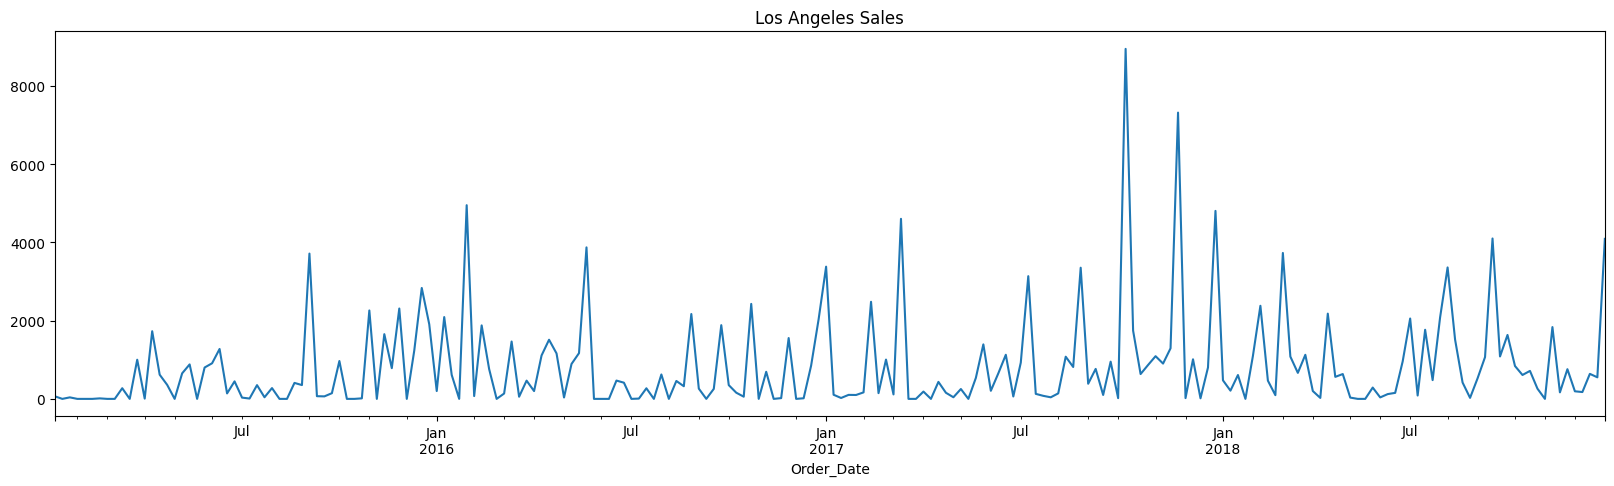

In [36]:
cities_data = data.set_index('Order_Date').groupby(['Region', 'State', 'City']).Sales.resample(rule='W').sum()
cities_data.West.California['Los Angeles'].plot(title='Los Angeles Sales', figsize=(20, 5))

## Which city has the highest sales in each highest selling state?

In [37]:
florida_cities = cities_data.South.Florida
florida_cities_sales = florida_cities.reset_index().set_index('Order_Date').groupby('City').sum().sort_values('Sales', ascending=False)

california_cities = cities_data.West.California
california_cities_sales = california_cities.reset_index().set_index('Order_Date').groupby('City').sum().sort_values('Sales', ascending=False)

newyork_cities = cities_data.East['New York']
newyork_cities_sales = newyork_cities.reset_index().set_index('Order_Date').groupby('City').sum().sort_values('Sales', ascending=False)

texas_cities = cities_data.Central.Texas
texas_cities_sales = texas_cities.reset_index().set_index('Order_Date').groupby('City').sum().sort_values('Sales', ascending=False)

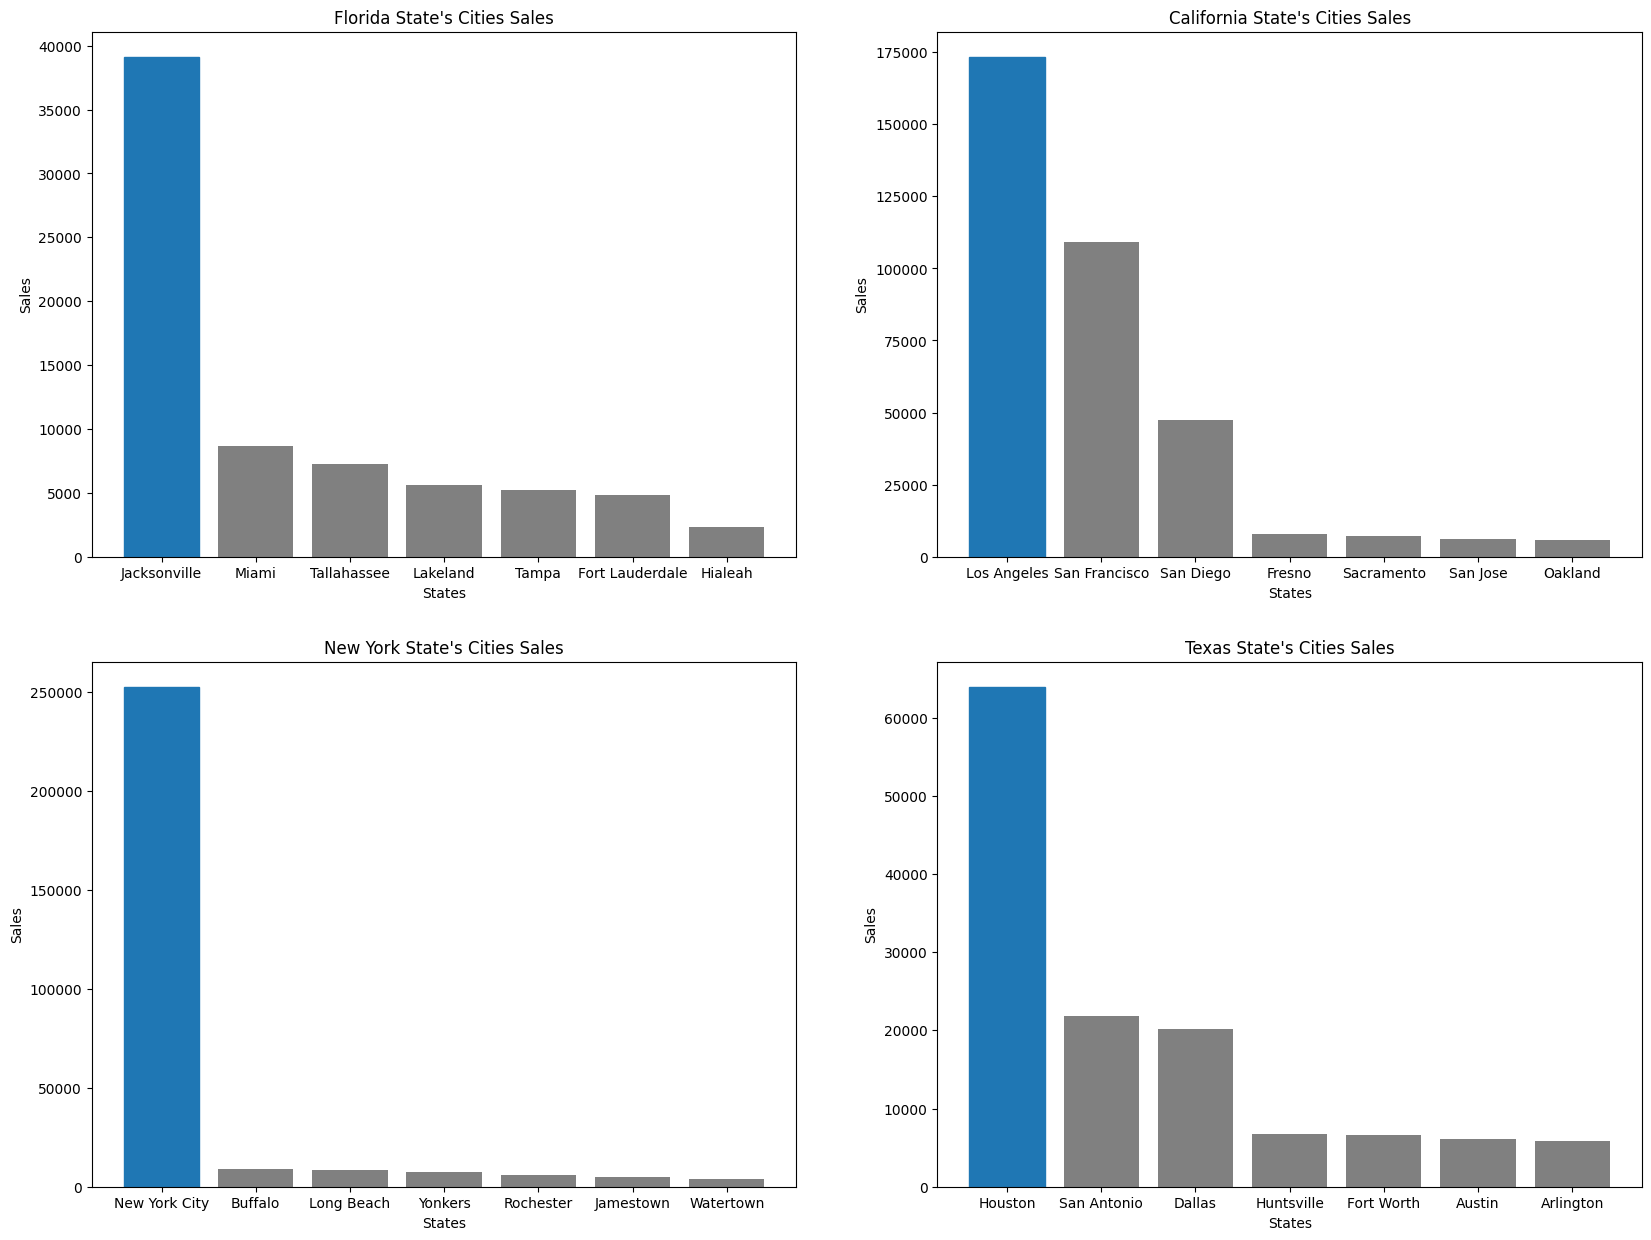

In [38]:
fig, ax = plt.subplots(2, 2, figsize=(20, 15))
row = 0
col = 0
state_names = ['Florida', 'California', 'New York', 'Texas']
for idx, city in enumerate([florida_cities_sales[0:7], california_cities_sales[0:7], newyork_cities_sales[0:7], texas_cities_sales[0:7]]):
    bar = ax[row][col].bar(x=city.index, height=city.Sales, color='Grey')
    bar[0].set_color('#1f77b4')
    ax[row][col].set_title(f"{state_names[idx]} State's Cities Sales")
    ax[row][col].set_xlabel('States')
    ax[row][col].set_ylabel('Sales')
    if col == 1:
        col = 0
        row += 1
    else:
        col += 1

- Florida has 36 cities out of which most sales are coming from only Jacksonville.    
- California has 80 cities but the only profitables ones seems to be Los Angeles, San Francisco and San Diego.     
- New York has 18 cities but only New York City is having high sales.     
- Texas has 53 cities but most of the sales are from Houston, San Antonio and Dallas. 
- Most sales are coming from just 1-3 cities in every state.    

# Key Takeaways
- West Region has the highest sales
- California State has the highest sales
- New York City has the highest sales
- Most of the states don't have very high sales
- Most sales are coming from 1-3 cities in every highest selling state

# Customers
- Customers are divided into 3 segments.
- There are 731 recorded customers.

In [39]:
customers_data = data.set_index('Order_Date').groupby(['Segment']).Sales.resample(rule='W').sum()

## Trend in Customers Sales

<Axes: title={'center': 'Consumer Sales'}, xlabel='Order_Date', ylabel='Sales'>

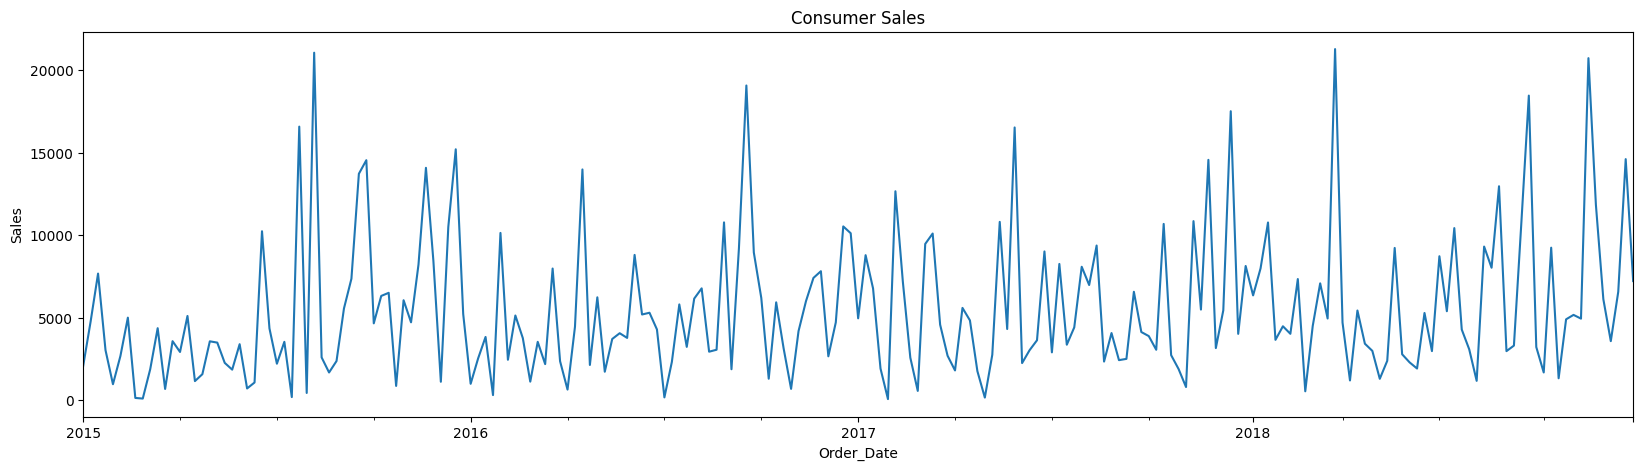

In [40]:
customers_data.Consumer.plot(title='Consumer Sales', figsize=(20, 5), ylabel='Sales')

## Which customer segment has the highest sales?

In [41]:
customers_sales = customers_data.reset_index().set_index('Order_Date').groupby('Segment').sum().sort_values('Sales', ascending=False)
customers_sales/1000000

,Sales
Segment,
Consumer,1.148061
Corporate,0.688494
Home Office,0.424982


Text(0.5, 1.0, 'Sales according to Customer Segments')

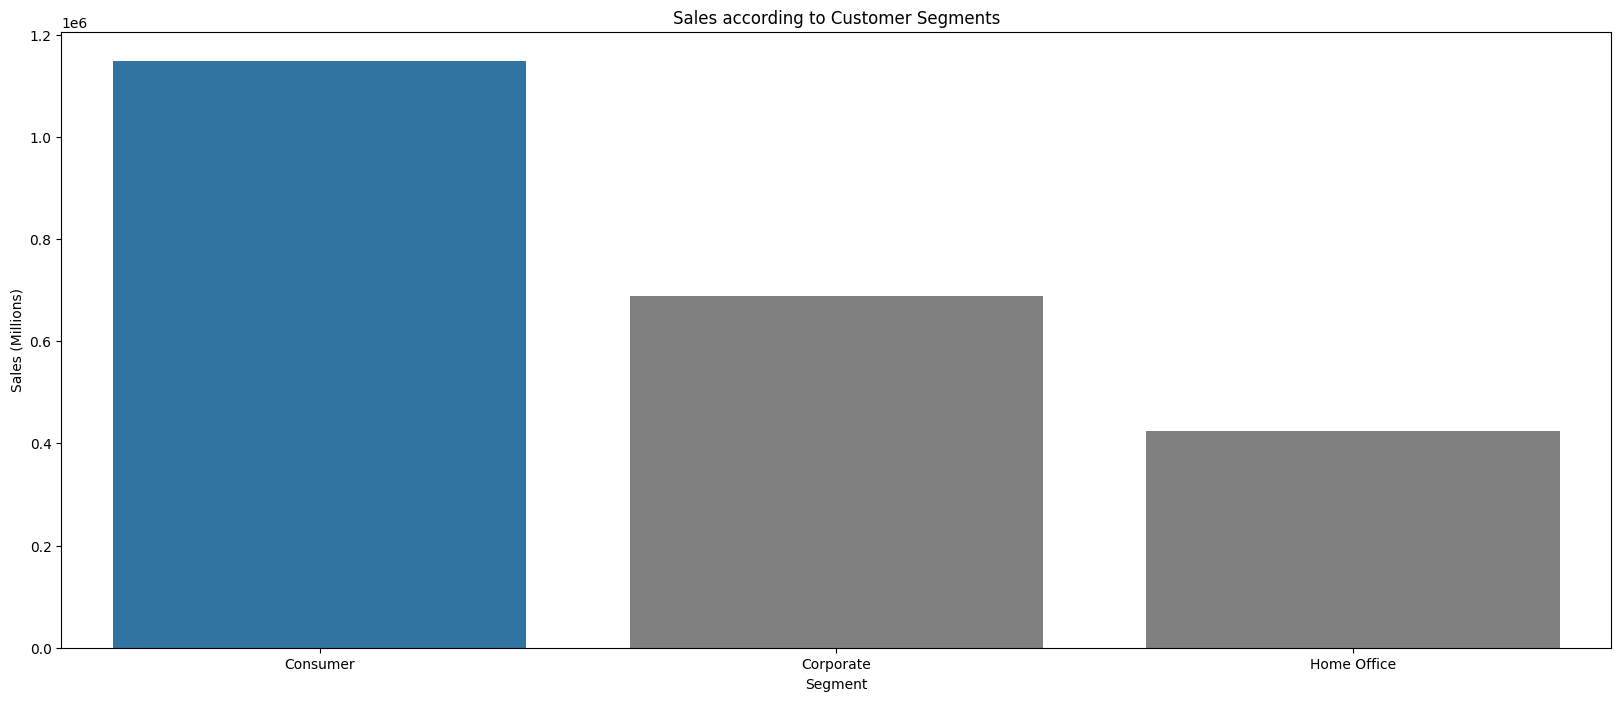

In [42]:
colors = ["#1f77b4" if x==customers_sales.index[0] else 'grey' for x in customers_sales.index]
plt.figure(figsize=(20, 8))
sns.barplot(x=customers_sales.index, y=customers_sales.Sales, color='Grey', palette=colors)
plt.ylabel('Sales (Millions)')
plt.title('Sales according to Customer Segments')

- Consumer segment has the highest sales.

## Who are the VIP customers?

In [43]:
vip_customers_data = data.set_index('Order_Date').groupby(['Customer_Name']).Sales.resample(rule='W').sum()
vip_customers_sales = vip_customers_data.reset_index().set_index('Order_Date').groupby('Customer_Name').sum().sort_values('Sales', ascending=False)
vip_customers_sales

,Sales
Customer_Name,
Sean Miller,25043.050
Tamara Chand,19052.218
Raymond Buch,15117.339
Tom Ashbrook,14595.620
Adrian Barton,14473.571
...,...
Mitch Gastineau,16.739
Carl Jackson,16.520
Sung Chung,14.112


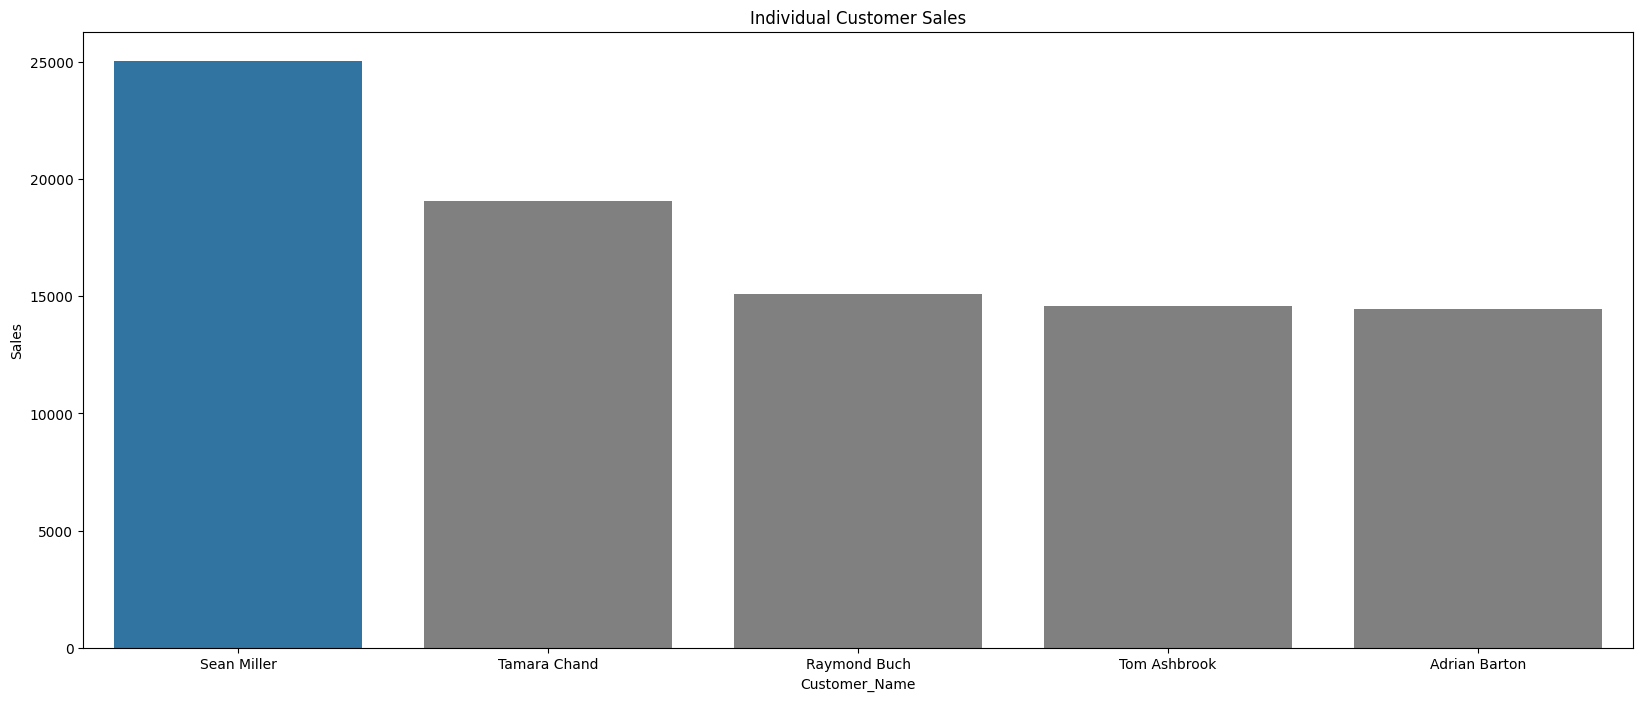

In [44]:
# plt.bar(x=vip_customers_sales[0:5].index, height=vip_customers_sales[0:5].Sales)
colors = ["#1f77b4" if x==vip_customers_sales[0:5].index[0] else 'grey' for x in vip_customers_sales[0:5].index]
plt.figure(figsize=(20, 8))
sns.barplot(x=vip_customers_sales[0:5].index, y=vip_customers_sales[0:5].Sales, color='Grey', palette=colors)
plt.ylabel('Sales')
plt.title('Individual Customer Sales')
plt.show()

- Sean Miller, Tamara Chand, Raymond Buch, Tom Ashbrook and Adrian Barton are the top 5 customers.

## How are the sales for customer segments in each region?

In [45]:
customers_regional_data = data.set_index('Order_Date').groupby(['Segment', 'Region']).Sales.resample(rule='W').sum()
customers_regional_data

Segment      Region   Order_Date
Consumer     Central  2015-01-04    1556.955
                      2015-01-11      34.752
                      2015-01-18    2854.480
                      2015-01-25     708.616
                      2015-02-01     240.500
                                      ...   
Home Office  West     2018-12-02      25.830
                      2018-12-09       0.000
                      2018-12-16    1404.850
                      2018-12-23      17.568
                      2018-12-30    3821.352
Name: Sales, Length: 2497, dtype: float64

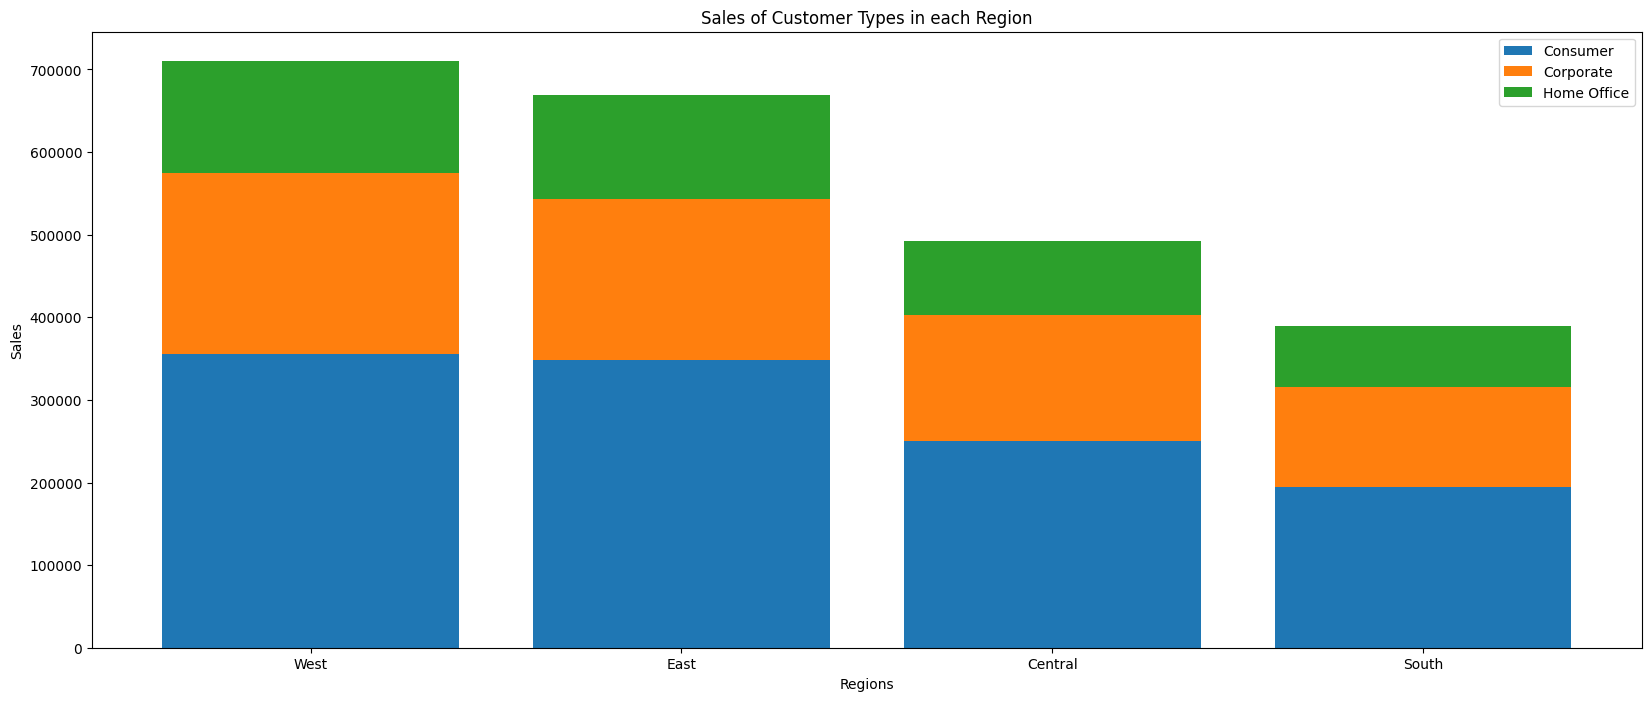

In [46]:

for idx, cus_type in enumerate(['Consumer', 'Corporate', 'Home Office']):
    sales = customers_regional_data[cus_type].reset_index().set_index('Order_Date').groupby('Region').sum().sort_values('Sales', ascending=False)
    if idx == 0:
        plt.figure(figsize=(20, 8))
        bar = plt.bar(x=sales.index, height=sales.Sales)
        prev = sales.Sales
    else:
        plt.bar(x=sales.index, height=sales.Sales, bottom=prev)
        prev += sales.Sales

plt.title('Sales of Customer Types in each Region')
plt.xlabel('Regions')
plt.ylabel('Sales')
plt.legend(['Consumer', 'Corporate', 'Home Office'])
plt.show()
# sns.barplot(x=customers_regional_data.reset_index().Segment, y=customers_regional_data.reset_index().Sales, data=customers_regional_data)

- West and East have similar sales in Consumer segment
- Consumer segment has the highest sales in all regions
- Corporate segement has the second highest while the Home Office segment has the lowest sales in all regions

## Key Takeaways
- Consumer type has the highest sales.
- Sean Miller, Tamara Chand, Raymond Buch, Tom Ashbrook and Adrian Barton are the top 5 customers.

# Products
- There are 3 product categories.
- There are 17 product sub-categories

In [47]:
products = {}
for product in data.Category.unique():
    products[product] = []
    for sub_product in data[data.Category == product].Sub_Category.unique():
        products[product].append(sub_product)
        
products

for product, sub_product in products.items():
    print(product, ': ', sub_product, '\n', len(sub_product), ' sub-categories')

Furniture :  ['Bookcases', 'Chairs', 'Tables', 'Furnishings'] 
 4  sub-categories
Office Supplies :  ['Labels', 'Storage', 'Art', 'Binders', 'Appliances', 'Paper', 'Envelopes', 'Fasteners', 'Supplies'] 
 9  sub-categories
Technology :  ['Phones', 'Accessories', 'Machines', 'Copiers'] 
 4  sub-categories


- There are 4 types of furnitures
- There are 9 types of office supplies
- There are 4 types of technologies

## Trend in Product Category

<Axes: title={'center': 'Furniture Sales'}, xlabel='Order_Date', ylabel='Sales'>

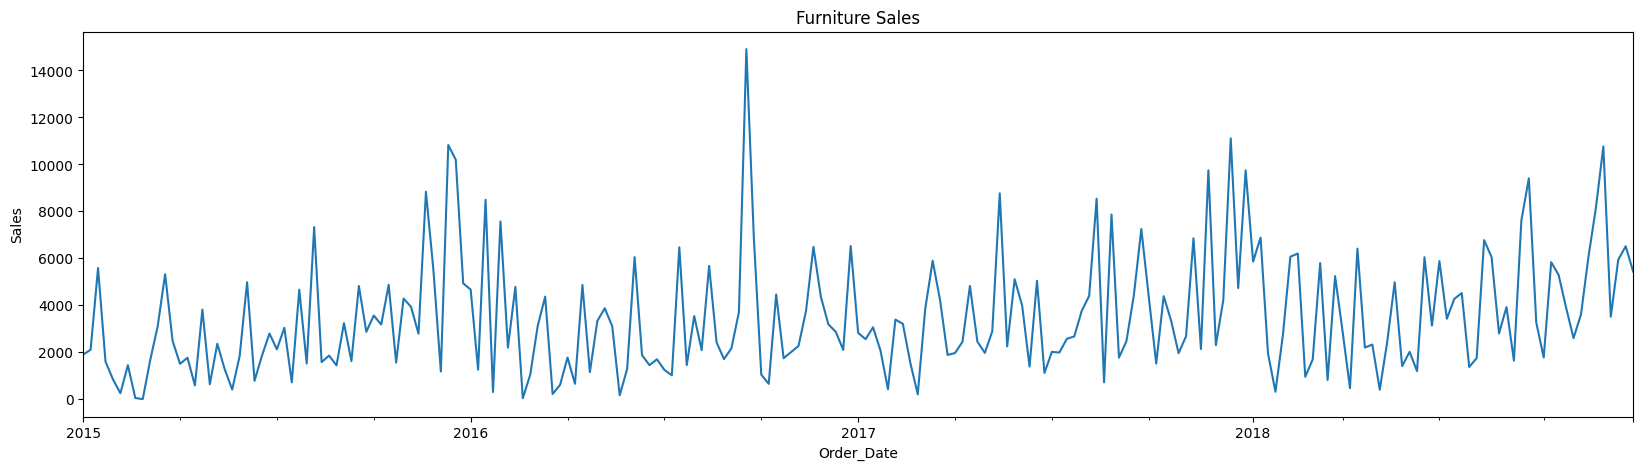

In [48]:
products_data = data.set_index('Order_Date').groupby(['Category']).Sales.resample(rule='W').sum()
products_data.Furniture.plot(title='Furniture Sales', figsize=(20, 5), ylabel='Sales')

## Which product type has the highest sales?

In [49]:
products_sales = products_data.reset_index().set_index('Order_Date').groupby('Category').sum().sort_values('Sales', ascending=False)
products_sales

,Sales
Category,
Technology,827455.8730
Furniture,728658.5757
Office Supplies,705422.3340


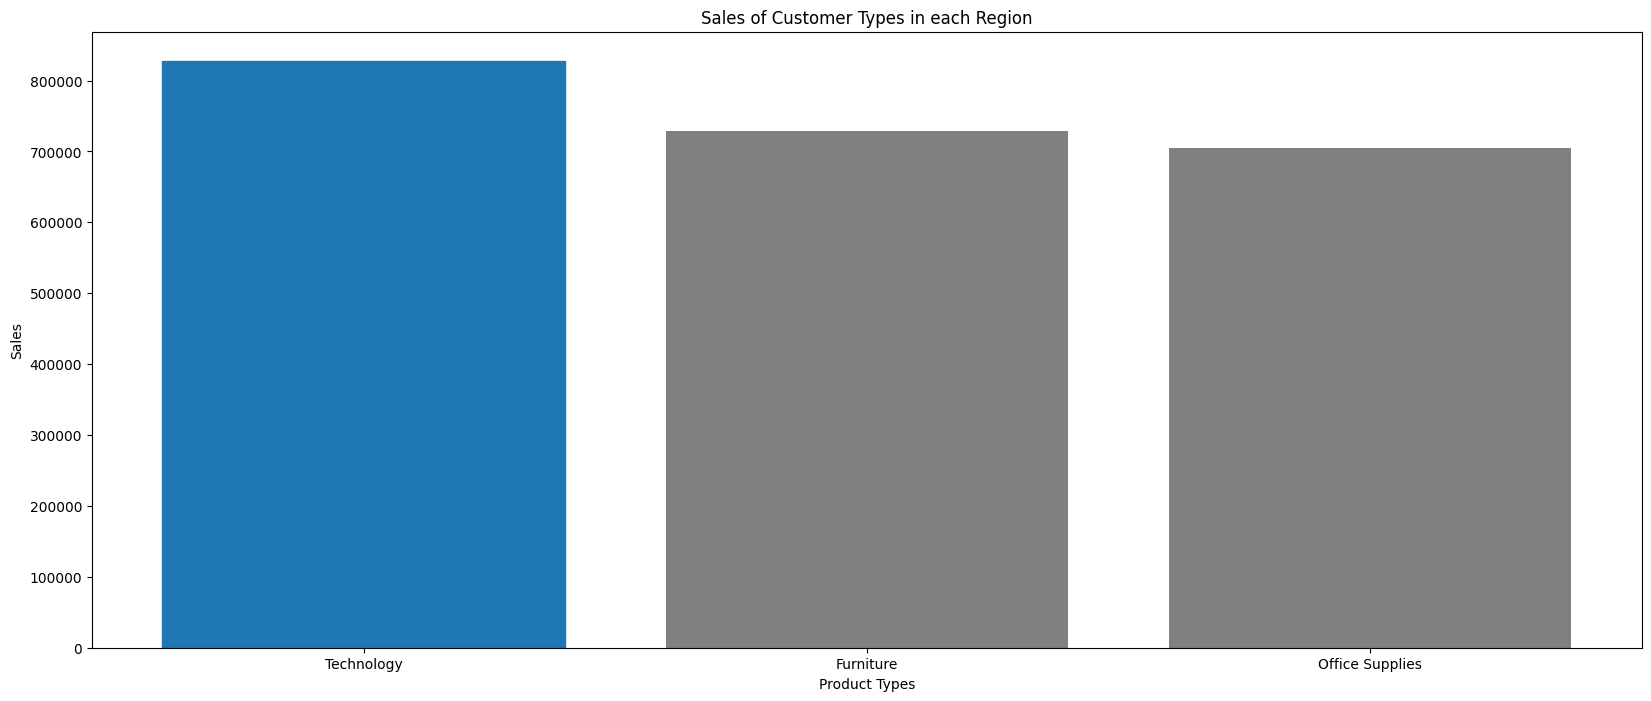

In [50]:
plt.figure(figsize=(20, 8))
bar = plt.bar(x=products_sales.index, height=products_sales.Sales, color='grey')
plt.title('Sales of Customer Types in each Region')
plt.xlabel('Product Types')
plt.ylabel('Sales')
bar[0].set_color('#1f77b4')

- Surprisingly, all the categories are not too far away from each other.
- Technology has the highest sales but furniture and office supplies are not very far behind.

## Which product was sold more often?

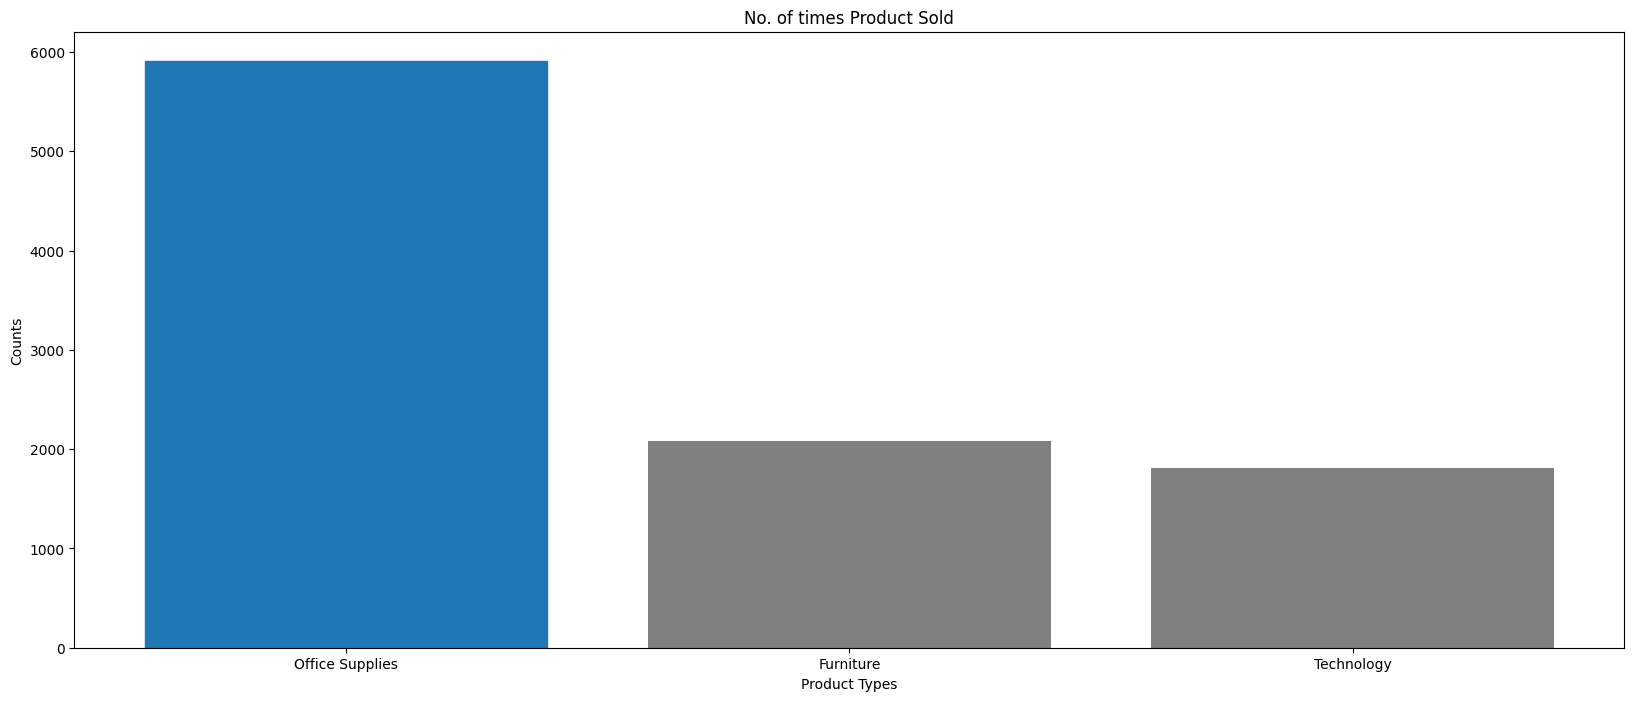

In [51]:
colors = ["#1f77b4" if x=='Office Supplies' else 'grey' for x in vip_customers_sales[0:5].index]
products_count = data.Category.value_counts()
plt.figure(figsize=(20, 8))
bar = plt.bar(x=products_count.index, height=products_count, color='Grey')
bar[0].set_color('#1f77b4')
plt.xlabel('Product Types')
plt.ylabel('Counts')
plt.title('No. of times Product Sold')
plt.show()

- Technology have the highest sales but it was sold less times.
- Office supplies have the lowest sales but they are sold a lot more often.

## Trend in Sub-Category of Product Type

<Axes: title={'center': 'Tables Sales'}, xlabel='Order_Date', ylabel='Sales'>

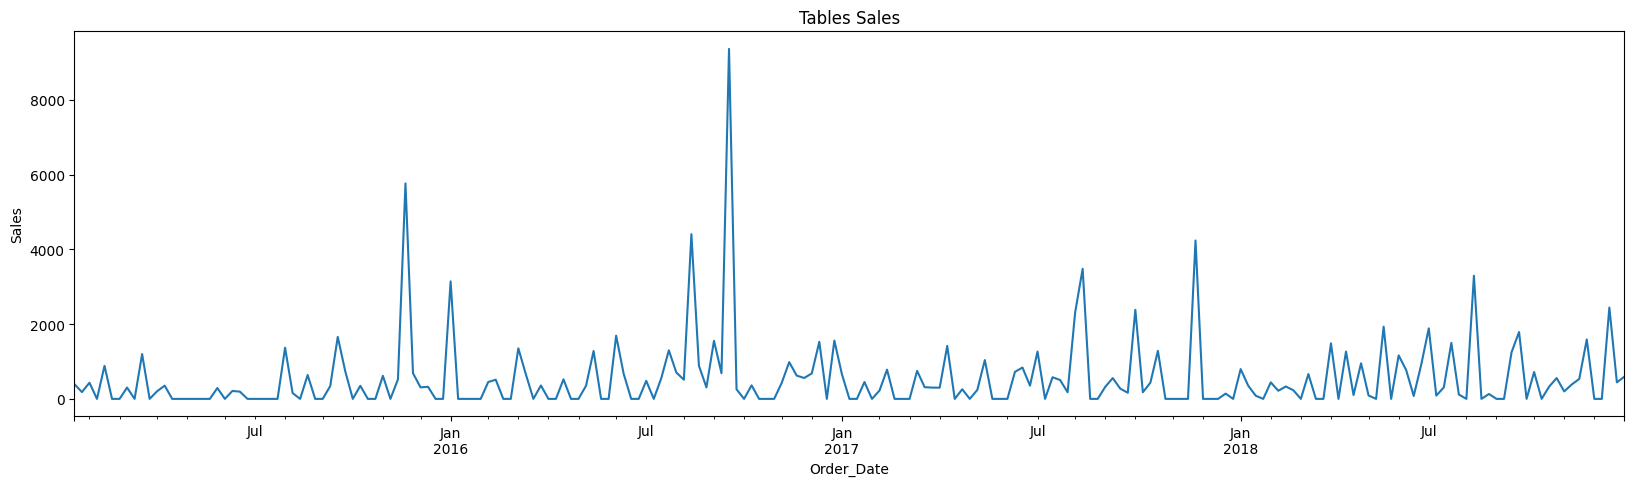

In [52]:
sub_products_data = data.set_index('Order_Date').groupby(['Category', 'Sub_Category']).Sales.resample(rule='W').sum()
sub_products_data.Furniture.Bookcases.plot(title='Tables Sales', figsize=(20, 5), ylabel='Sales')

## Which sub-category has the highest sales in each product type?

In [53]:
furniture_data = sub_products_data.Furniture
furniture_sales = furniture_data.reset_index().set_index('Order_Date').groupby('Sub_Category').sum().sort_values('Sales', ascending=False)

technology_data = sub_products_data.Technology
technology_sales = technology_data.reset_index().set_index('Order_Date').groupby('Sub_Category').sum().sort_values('Sales', ascending=False)

office_supplies_data = sub_products_data['Office Supplies']
office_supplies_sales = office_supplies_data.reset_index().set_index('Order_Date').groupby('Sub_Category').sum().sort_values('Sales', ascending=False)

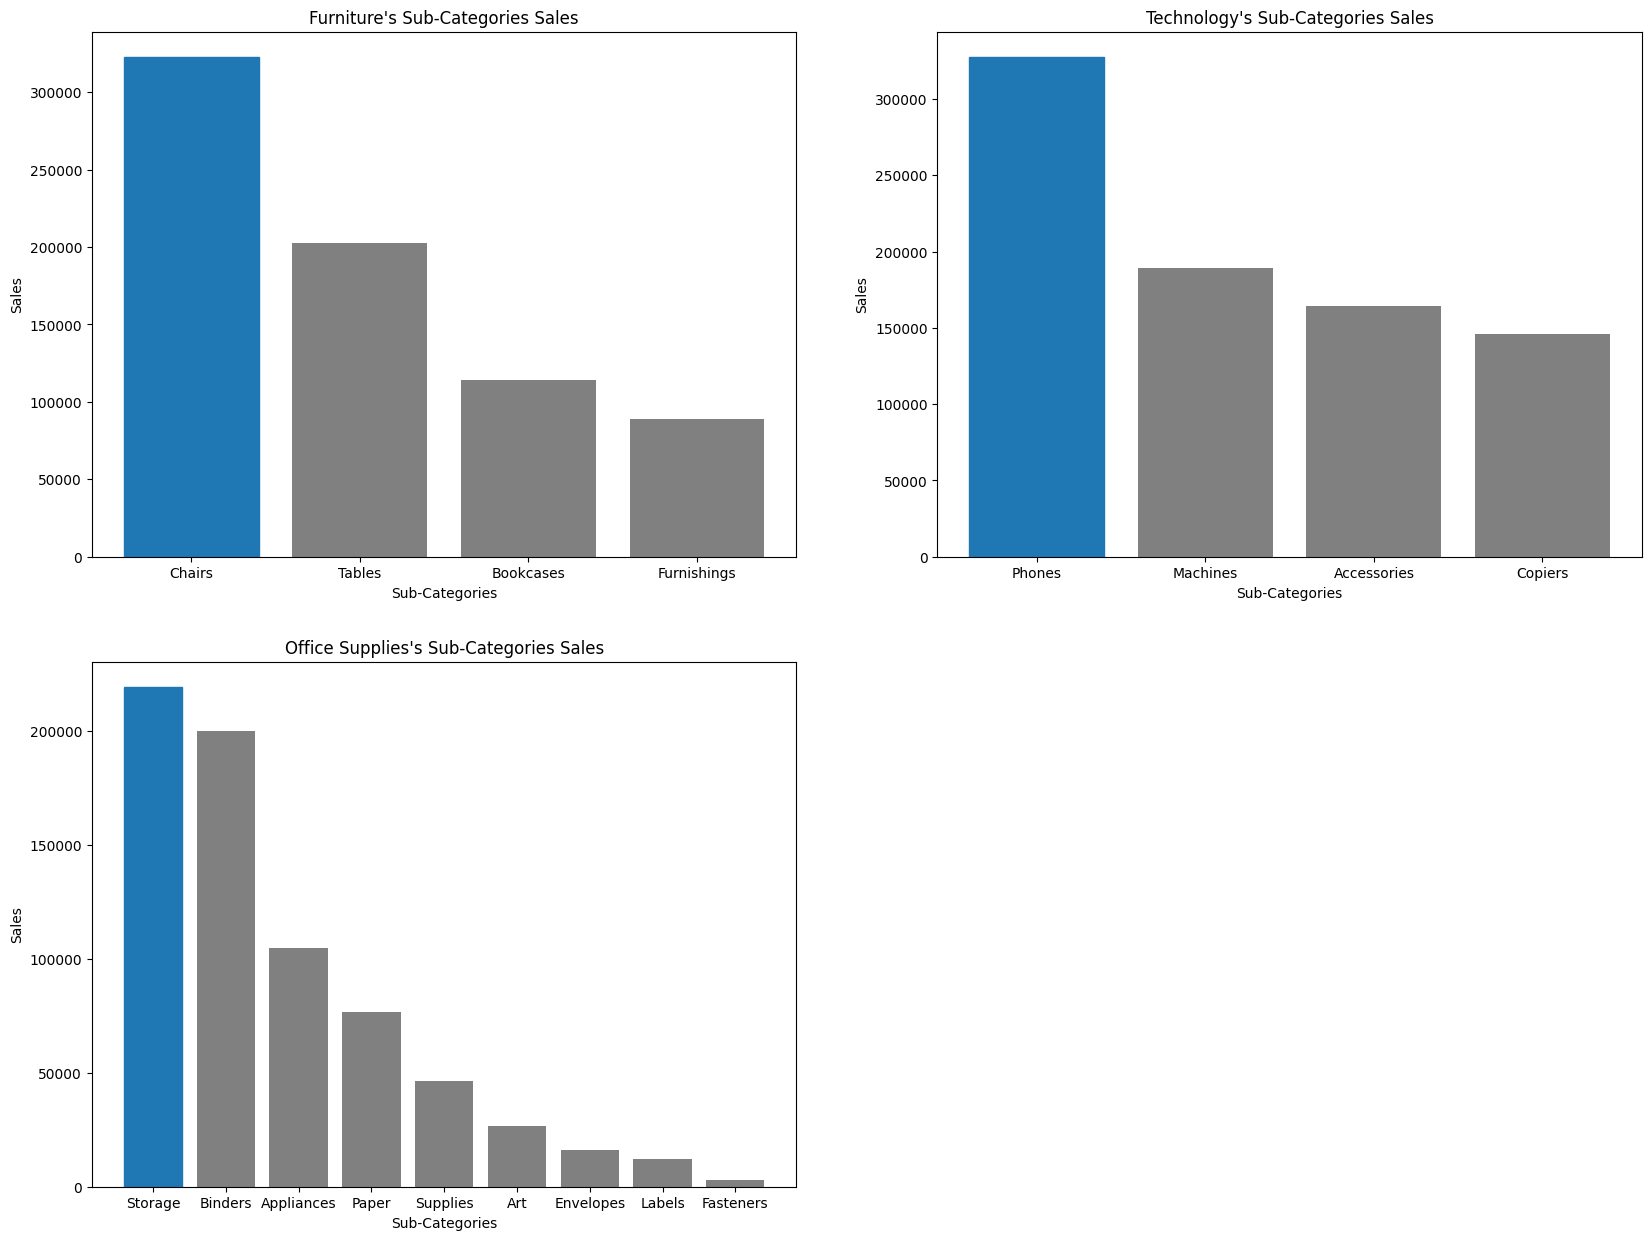

In [54]:
fig, ax = plt.subplots(2, 2, figsize=(20, 15))
row = 0
col = 0
product_names = ['Furniture', 'Technology', 'Office Supplies']
for idx, product in enumerate([furniture_sales, technology_sales, office_supplies_sales]):
    bar = ax[row][col].bar(x=product.index, height=product.Sales, color='Grey')
    bar[0].set_color('#1f77b4')
    ax[row][col].set_title(f"{product_names[idx]}'s Sub-Categories Sales")
    ax[row][col].set_xlabel('Sub-Categories')
    ax[row][col].set_ylabel('Sales')
    if col == 1:
        col = 0
        row += 1
    else:
        col += 1
        
fig.delaxes(ax[row][col])

## Highest Sales
- Technology: Phones
- Furniture: Chairs
- Office Supplies: Storage 

## Which sub-category of the product type was sold more often?

In [55]:
furniture_counts = data[data.Category == 'Furniture'].Sub_Category.value_counts()
technology_counts = data[data.Category == 'Technology'].Sub_Category.value_counts()
office_supplies_counts = data[data.Category == 'Office Supplies'].Sub_Category.value_counts()

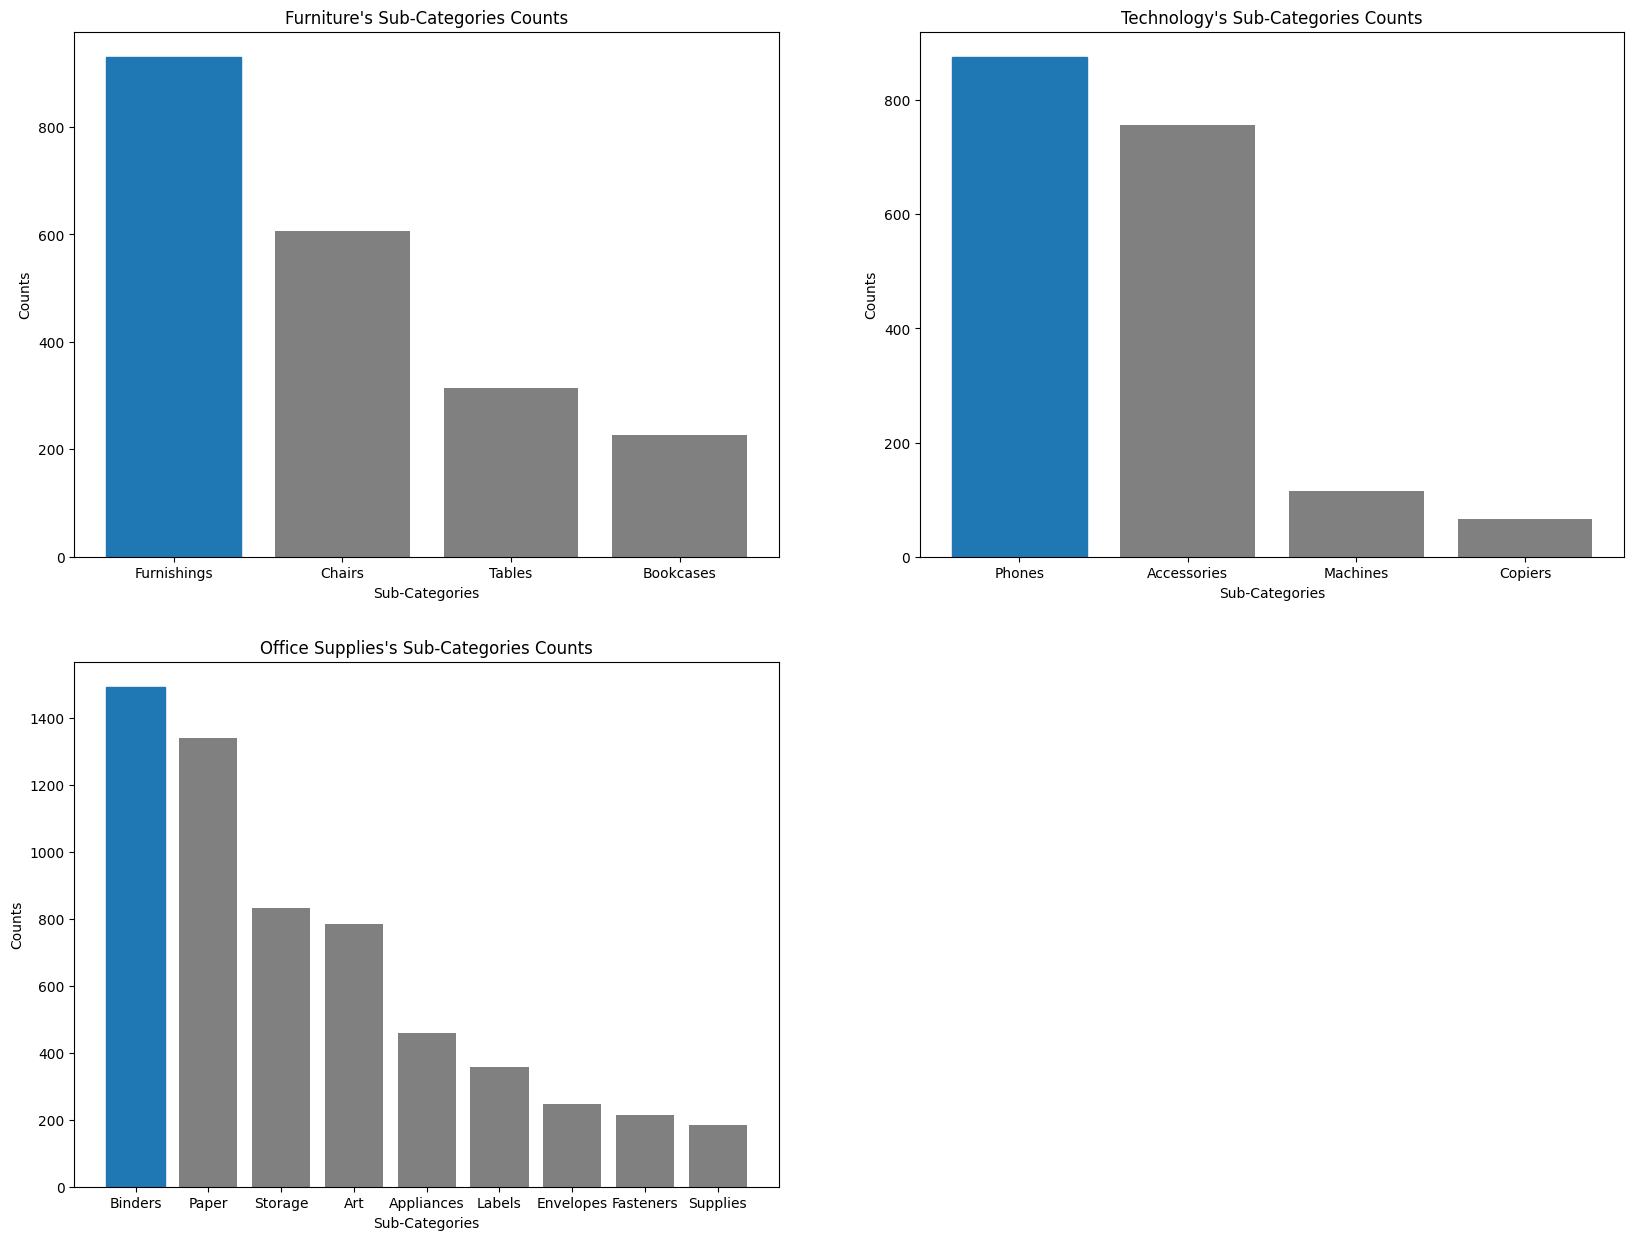

In [56]:
fig, ax = plt.subplots(2, 2, figsize=(20, 15))
row = 0
col = 0
product_names = ['Furniture', 'Technology', 'Office Supplies']
for idx, product in enumerate([furniture_counts, technology_counts, office_supplies_counts]):
    bar = ax[row][col].bar(x=product.index, height=product, color='Grey')
    bar[0].set_color('#1f77b4')
    ax[row][col].set_title(f"{product_names[idx]}'s Sub-Categories Counts")
    ax[row][col].set_xlabel('Sub-Categories')
    ax[row][col].set_ylabel('Counts')
    if col == 1:
        col = 0
        row += 1
    else:
        col += 1
        
fig.delaxes(ax[row][col])

- Furnishings are sold more often but chairs have the highest sales.
- Phones are sold more often and also have the highest sales in technology category.
- Binders is sold more and is not far behind storage in sales.

## Product Items
- There are 1861 different product items.
- Each of them belong to a category and sub-category.

## Which product items are sold more often?

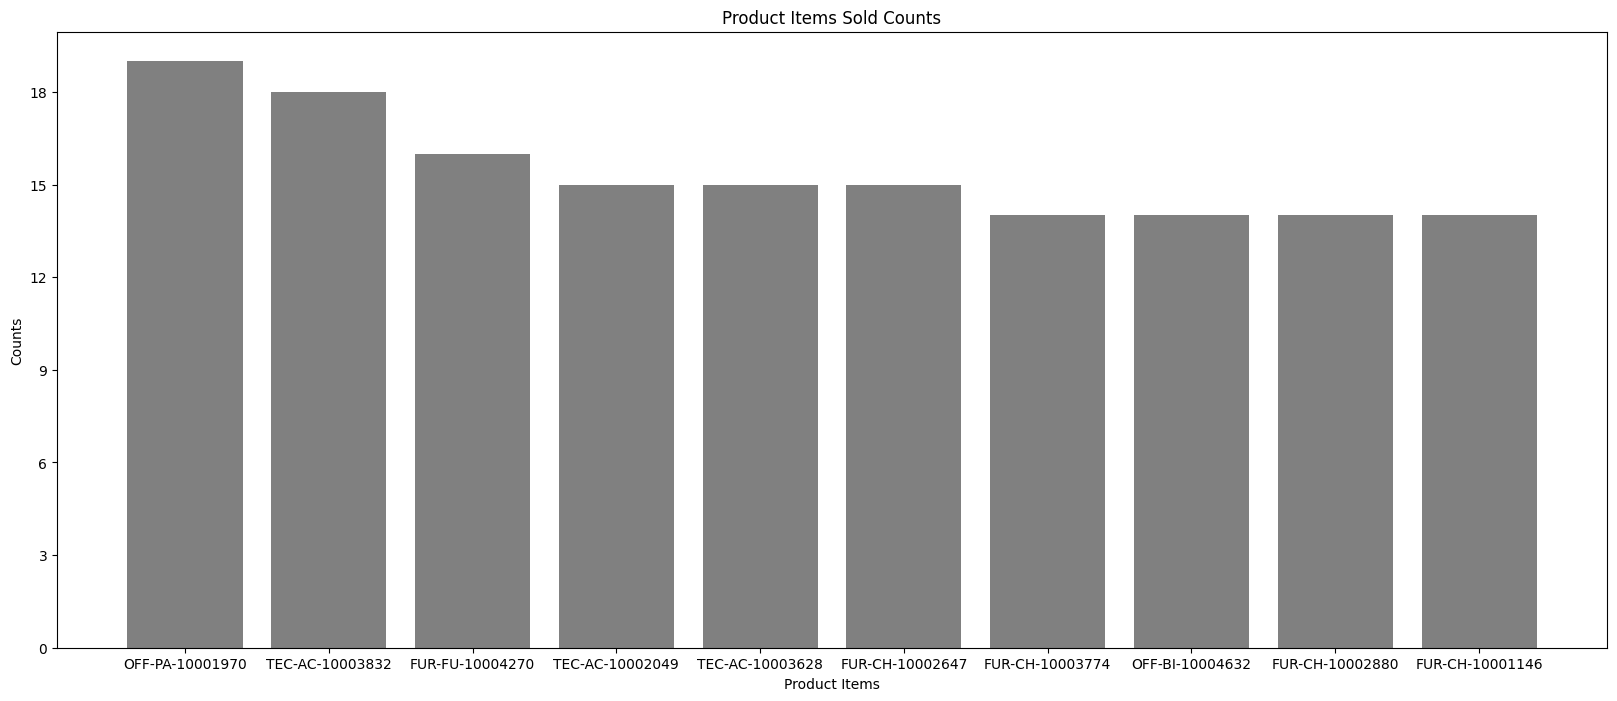

In [57]:
items_counts = data.Product_ID.value_counts()
plt.figure(figsize=(20,8))
plt.bar(x=items_counts[0:10].index, height=items_counts[0:10], color='grey')
plt.yticks([x for x in range(0, 21, 3)])
plt.xlabel('Product Items')
plt.ylabel('Counts')
plt.title('Product Items Sold Counts')
plt.show()

- These 10 products were sold more often.

## Which product items aren't sold often?

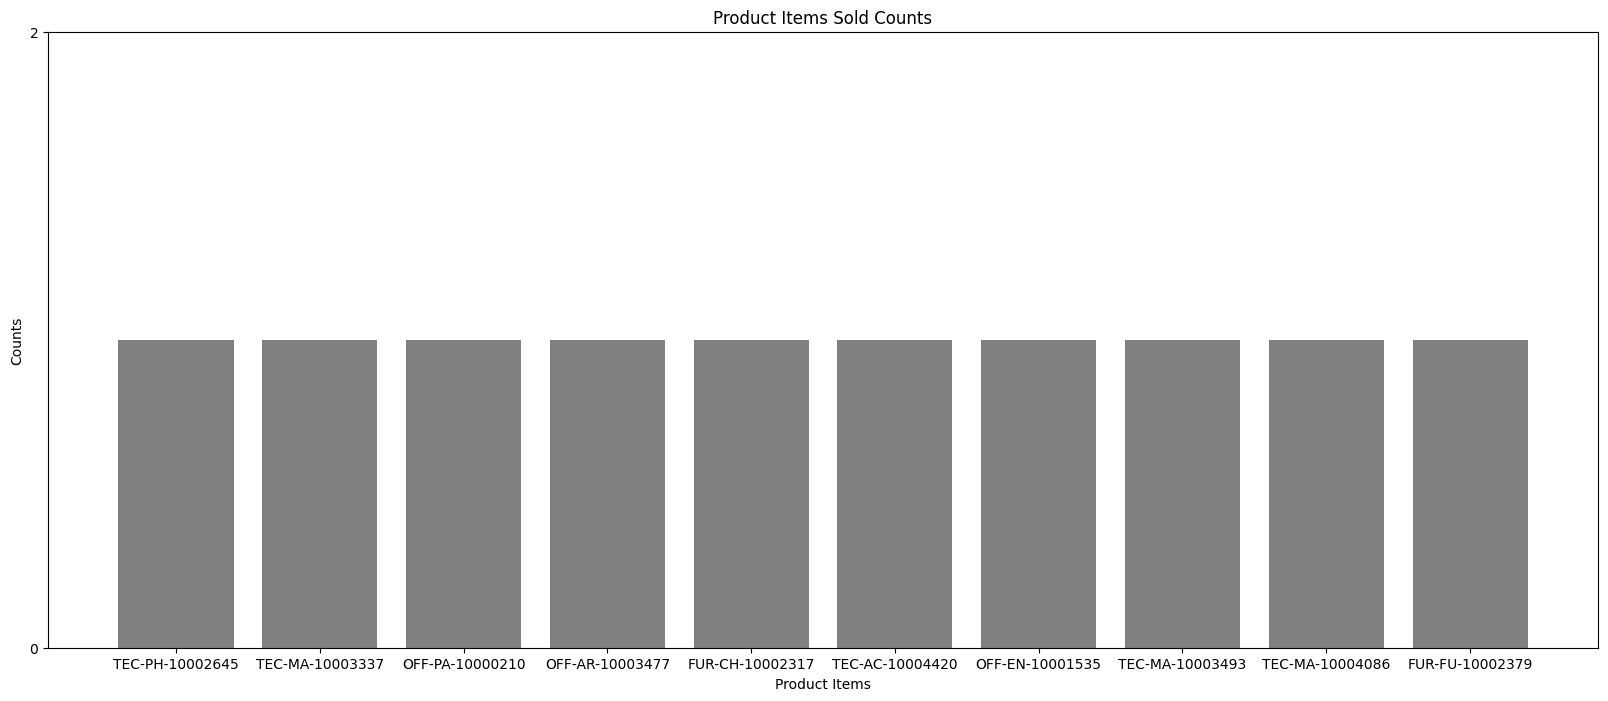

In [58]:
items_counts = data.Product_ID.value_counts().sort_values(ascending=True)
plt.figure(figsize=(20,8))
plt.bar(x=items_counts[0:10].index, height=items_counts[0:10], color='grey')
plt.yticks([x for x in range(0, 4, 2)])
plt.xlabel('Product Items')
plt.ylabel('Counts')
plt.title('Product Items Sold Counts')
plt.show()

- These 10 and some more product items aren't sold very often.

## Which product items have high sales?

In [59]:
items_sales = data.set_index('Order_Date').groupby('Product_ID').Sales.resample(rule='W').sum().groupby('Product_ID').sum()

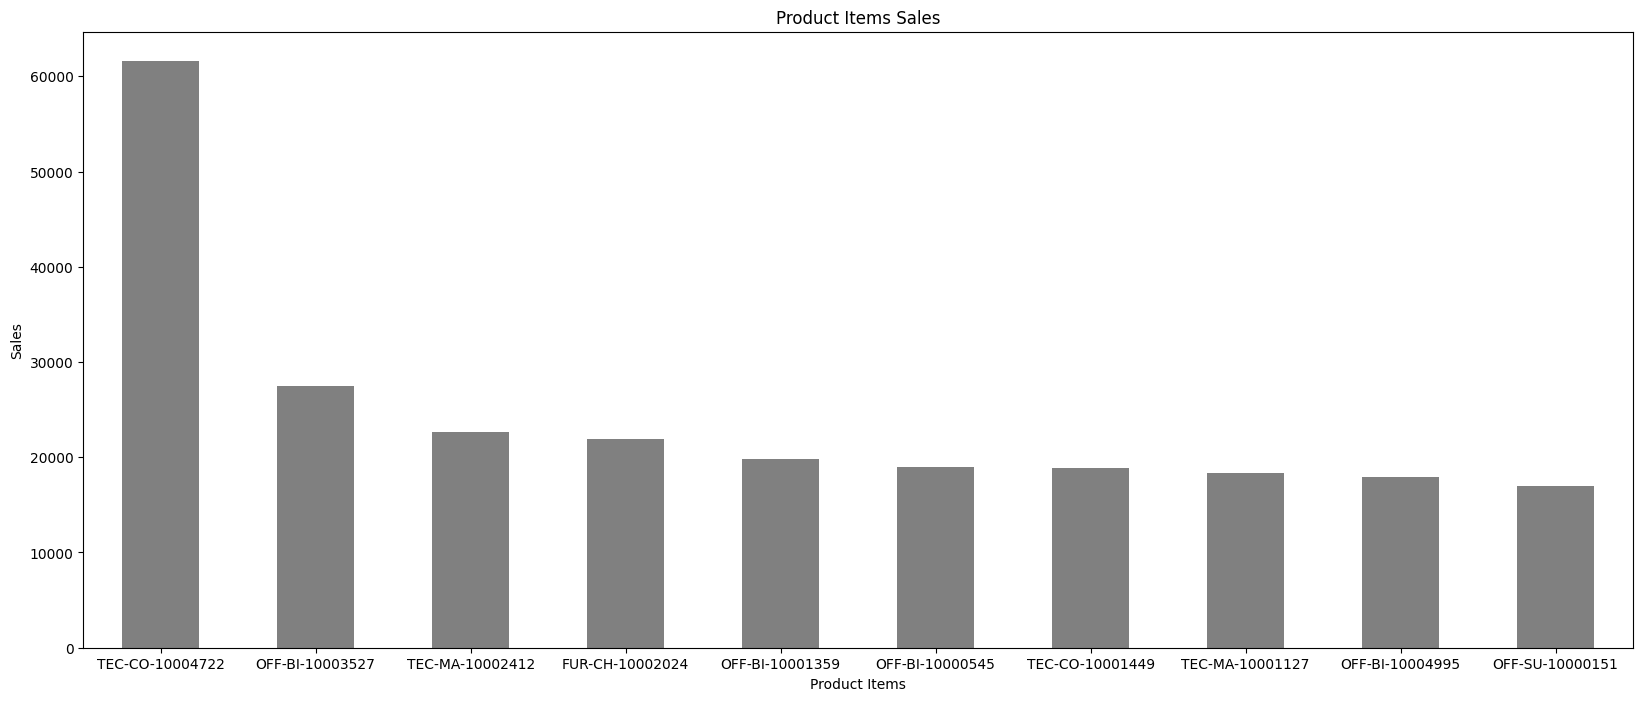

In [60]:
items_sales.sort_values(ascending=False)[0:10].plot(kind='bar', color='grey', figsize=(20, 8), xlabel='Product Items', ylabel='Sales', title='Product Items Sales')
plt.xticks(rotation=0)
plt.show()

- These 10 product items have the highest sales

## Which product items have the low sales?

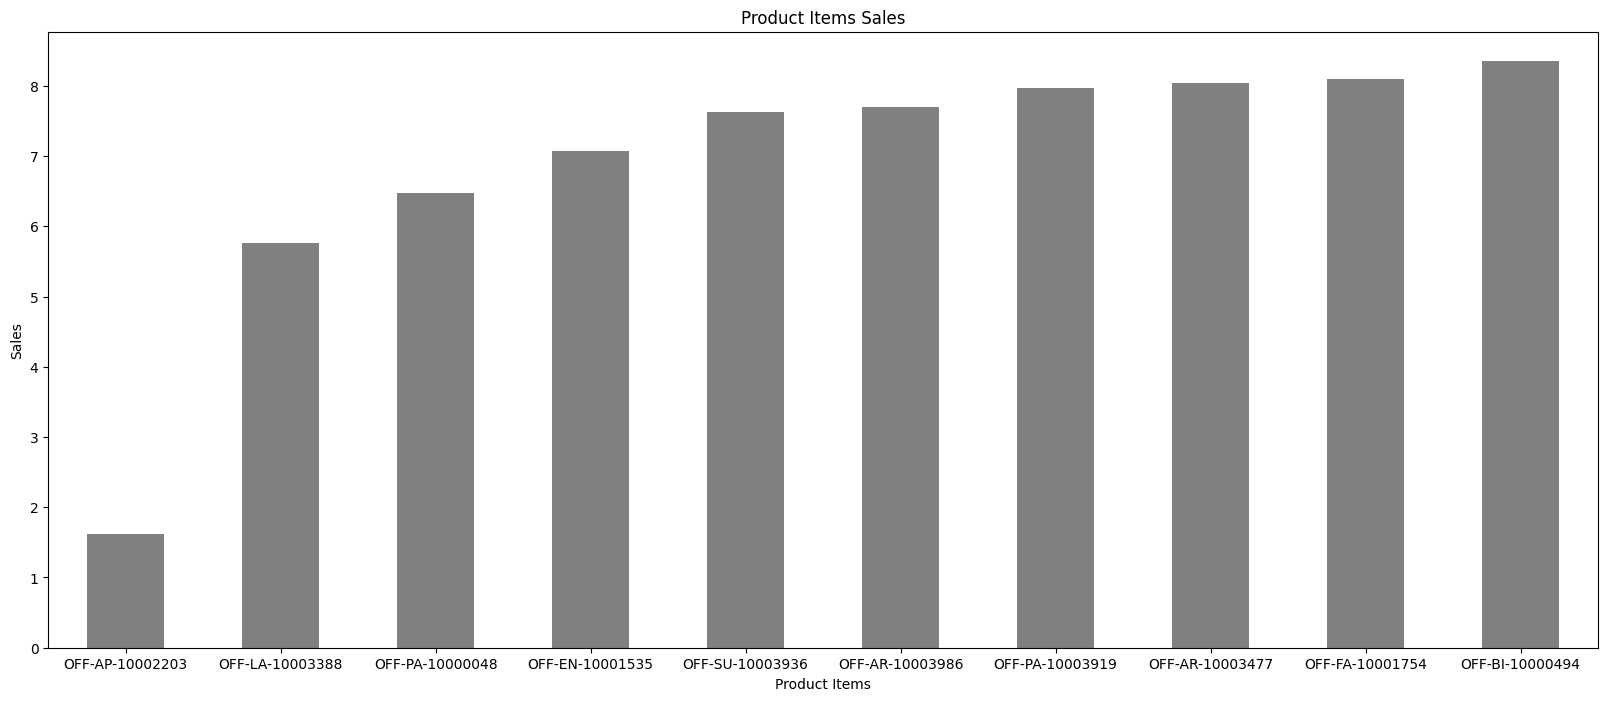

In [61]:
items_sales.sort_values(ascending=True)[0:10].plot(kind='bar', color='grey', figsize=(20, 8), xlabel='Product Items', ylabel='Sales', title='Product Items Sales')
plt.xticks(rotation=0)
plt.show()

- These 10 product items have the lowest sales.

## Key Takeaways
- Technology have the highest sales but it was sold less times.
- Office supplies have the lowest sales but they are sold a lot more often.
- Furnishings are sold more often but chairs have the highest sales.
- Phones are sold more often and also have the highest sales in technology category.
- Binders is sold more and is not far behind storage in sales.

## Recommendations
- Invest more resources in the West and East regions as they consistently show higher sales. 
- Analyze successful strategies from these regions and implement them in other areas.
- Concentrate efforts on the top-selling cities within each state. 
- Replicate successful strategies in these cities across the state to maximize sales potential.
- Allocate a significant portion of resources to cater to the consumer segment due to their high sales contribution. 
- This could include targeted marketing campaigns, exclusive offers, and personalized recommendations.
- Despite lower sales in corporate and home office segments, prioritize customer retention efforts. 
- Implement loyalty programs and tailored discounts to incentivize repeat purchases from these segments.
- Capitalize on the success of Technology products. 
- Introduce new and innovative tech products to attract tech-savvy customers and drive higher sales.
- Promote office supplies through bundle deals or exclusive offers to increase sales frequency among customers purchasing these items.
- Based on sales patterns, adjust inventory levels for different products. 
- Reduce inventory for slow-moving items and ensure sufficient stock for products with high demand.

# Conclusion
- This analysis focused on trend in total sales and the trends in three different categories which are geography, products and customers.
- Sales distribution in each category was pointed out 
- Further things that can be done:
    - Analyzing the customers and products more deeply
    - Creating a dashboard for easily checking the sales in all the categories
    - Checking effect of the promotions on discounts on various products' sales
    - Checking effect of the ship mode on the sales
    - Forecasting the sales